# Graded Challenge 3

Name : `Kamil Riyadi Alam Situmeang`

Batch : `FTDS009`

## I. Introduction

This project is meant for fulfilling `Hacktiv8 Fulltime Datascience Bootcamp Graded Challenge 3 assignment.`

In this project, I will try to create classification machine learning model using `Ensemble` model.

### I.2 Dataset Description

Dataset for this project is made available by [`Larxel`](https://www.kaggle.com/andrewmvd), Kaggler from Brazil.\
You can check the dataset [here.](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data) Under file name `heart_failure_clinical_records_dataset.csv`

**About this dataset:**

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and `this dataset contains 12 features that can be used to predict mortality by heart failure.`

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

------------------------------------------------------------------------------------------------------------------------------------------

**Attribute Information**
| Features                  | Description                                                           |
| ------------------------- | --------------------------------------------------------------------- |
| age                       | Age                                                                   |
| anaemia                   | Decrease of red blood cells or hemoglobin (boolean)                   |
| creatinine\_phosphokinase | Level of the CPK enzyme in the blood (mcg/L)                          |
| diabetes                  | If the patient has diabetes (boolean)                                 |
| ejection\_fraction        | Percentage of blood leaving the heart at each contraction (percentage)|
| high\_blood\_pressure     | If the patient has hypertension (boolean)                             |
| platelets                 | Platelets in the blood (kiloplatelets/mL)                             |
| serum\_creatinine         | Level of serum creatinine in the blood (mg/dL)                        |
| serum\_sodium             | Level of serum sodium in the blood (mEq/L)                            |
| sex                       | Woman or man (binary)                                                 |
| smoking                   | If the patient smokes or not (boolean)                                |
| time                      | Follow-up period (days)                                               |

------------------------------------------------------------------------------------------------------------------------------------------
| Target / Label            | Description                                                           |
| ------------------------- | --------------------------------------------------------------------- |
| DEATH\_EVENT              | If the patient deceased during the follow-up period (boolean)         |

------------------------------------------------------------------------------------------------------------------------------------------

**Acknowledgements:**

**Citation**
Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020). [link](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5)

**License**
CC BY 4.0

### I.3 Objectives

Main objectives for this project are:
- Create classification machine learning model using `Ensemble` model.
- Predict wether `DEATH_EVENT` will happen or not with given dataset.

## II. Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt
from scipy import stats

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Data Preprocessing
from sklearn.model_selection import train_test_split
from feature_engine.outliers import OutlierTrimmer, Winsorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Model
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV

# Metric
from sklearn.metrics import classification_report, roc_auc_score, auc, RocCurveDisplay, roc_curve

import warnings
warnings.filterwarnings("ignore")

## III. Data Loading


In [2]:
# Load Data and save it in `df_og` variable
df_og = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Make copy from the df
df = df_og.copy()

### Dataset Preview

In [3]:
# Show the dataset
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# Dataset Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
# Dataset Shape
df.shape

(299, 13)

In [6]:
# Null value summary
df.isnull().sum().sort_values()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
# Dataset Check
df.describe(percentiles=[0.5]).T

,count,mean,std,min,50%,max
age,299.0,60.833893,11.894809,40.0,60.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,250.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,38.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,262000.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,1.1,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,137.0,148.0
sex,299.0,0.648829,0.478136,0.0,1.0,1.0


Insight from `Dataset Preview` process:

Based on above process, I get these information:

- The dataset consist of `299 rows` of entries and `13 columns.`
- There are `10 features` that is `integer type` and `3 features` that is `float type`
- There are no apparent missing values but I am going to check more of it later in the process.
- There is no strange values in the dataset preview.

## IV. Exploratory Data Analysis

### Preliminary Check

Before going deep into the dataset, Let's generaly check the dataset.

In [8]:
# Duplicate entry check
df.duplicated().sum()

0

Looks like our dataset is free from `duplicate values.`
Now let's get deeper with each variable.

In [9]:
# Preliminary Check
# Variable : age
# Description : Age

var = 'age'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Descriptive stats:')
print(df[var].describe())

variable: age
null value count:  0

Descriptive stats:
count    299.000000
mean      60.833893
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64


From result above We can see that minimum age is 40 and maximum age is 95, with mean of 60 years old.\
Frome here I know that all patients in the records is an `Adults`.

I think this feature is good to go.

In [10]:
# Preliminary Check
# Variable : anaemia
# Description : Decrease of red blood cells or hemoglobin (boolean) 

var = 'anaemia'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Unique Value Count:', df[var].nunique())
print(df[var].value_counts())

variable: anaemia
null value count:  0

Unique Value Count: 2
0    170
1    129
Name: anaemia, dtype: int64


`anaemia` features is already match the description. this is `categorical-numerical` features.

I think this feature is good to go.

In [11]:
# Preliminary Check
# Variable : creatinine_phosphokinase
# Description : Level of the CPK enzyme in the blood (mcg/L) 

var = 'creatinine_phosphokinase'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Descriptive stats:')
print(df[var].describe())

variable: creatinine_phosphokinase
null value count:  0

Descriptive stats:
count     299.000000
mean      581.839465
std       970.287881
min        23.000000
25%       116.500000
50%       250.000000
75%       582.000000
max      7861.000000
Name: creatinine_phosphokinase, dtype: float64


From result above We can see that minimum value is 23 and maximum value is 7861, this feature has extreme `range`.\
I will check it later in the process.

In [12]:
# Preliminary Check
# Variable : diabetes 
# Description : If the patient has diabetes (boolean)  

var = 'diabetes'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Unique Value Count:', df[var].nunique())
print(df[var].value_counts())

variable: diabetes
null value count:  0

Unique Value Count: 2
0    174
1    125
Name: diabetes, dtype: int64


`diabetes` features is already match the description. this is `categorical-numerical` features.\
I think this feature is good to go.

In [13]:
# Preliminary Check
# Variable : ejection_fraction 
# Description : Percentage of blood leaving the heart at each contraction (percentage)

var = 'ejection_fraction'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Descriptive stats:')
print(df[var].describe())

variable: ejection_fraction
null value count:  0

Descriptive stats:
count    299.000000
mean      38.083612
std       11.834841
min       14.000000
25%       30.000000
50%       38.000000
75%       45.000000
max       80.000000
Name: ejection_fraction, dtype: float64


From result above We can see that minimum value is 14 and maximum value is 80, this feature has high `range`.\
I will check it later in the process.

In [14]:
# Preliminary Check
# Variable : high_blood_pressure 
# Description : If the patient has hypertension (boolean)

var = 'high_blood_pressure'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Unique Value Count:', df[var].nunique())
print(df[var].value_counts())

variable: high_blood_pressure
null value count:  0

Unique Value Count: 2
0    194
1    105
Name: high_blood_pressure, dtype: int64


`high_blood_pressure` features is already match the description. this is `categorical-numerical` features.\
I think this feature is good to go.

In [15]:
# Preliminary Check
# Variable : platelets 
# Description : Platelets in the blood (kiloplatelets/mL)

var = 'platelets'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Descriptive stats:')
print(df[var].describe())

variable: platelets
null value count:  0

Descriptive stats:
count       299.000000
mean     263358.029264
std       97804.236869
min       25100.000000
25%      212500.000000
50%      262000.000000
75%      303500.000000
max      850000.000000
Name: platelets, dtype: float64


I think this feature is good to go.

In [16]:
# Preliminary Check
# Variable : serum_creatinine 
# Description : Level of serum creatinine in the blood (mg/dL)

var = 'serum_creatinine'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Descriptive stats:')
print(df[var].describe())

variable: serum_creatinine
null value count:  0

Descriptive stats:
count    299.00000
mean       1.39388
std        1.03451
min        0.50000
25%        0.90000
50%        1.10000
75%        1.40000
max        9.40000
Name: serum_creatinine, dtype: float64


I think this feature is good to go.

In [17]:
# Preliminary Check
# Variable : serum_sodium 
# Description : Level of serum sodium in the blood (mEq/L)

var = 'serum_sodium'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Descriptive stats:')
print(df[var].describe())

variable: serum_sodium
null value count:  0

Descriptive stats:
count    299.000000
mean     136.625418
std        4.412477
min      113.000000
25%      134.000000
50%      137.000000
75%      140.000000
max      148.000000
Name: serum_sodium, dtype: float64


I think this feature is good to go.

In [18]:
# Preliminary Check
# Variable : sex
# Description : Woman or man (binary)

var = 'sex'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Unique Value Count:', df[var].nunique())
print(df[var].value_counts())

variable: sex
null value count:  0

Unique Value Count: 2
1    194
0    105
Name: sex, dtype: int64


`sex` features is already match the description. this is `categorical-numerical` features.\
I think this feature is good to go.

In [19]:
# Preliminary Check
# Variable : smoking  
# Description : If the patient smokes or not (boolean)

var = 'smoking'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Unique Value Count:', df[var].nunique())
print(df[var].value_counts())

variable: smoking
null value count:  0

Unique Value Count: 2
0    203
1     96
Name: smoking, dtype: int64


`smoking` features is already match the description. this is `categorical-numerical` features.\
I think this feature is good to go.

In [20]:
# Preliminary Check
# Variable : time 
# Description : Follow-up period (days)

var = 'time'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Descriptive stats:')
print(df[var].describe().round())

variable: time
null value count:  0

Descriptive stats:
count    299.0
mean     130.0
std       78.0
min        4.0
25%       73.0
50%      115.0
75%      203.0
max      285.0
Name: time, dtype: float64


From result above We can see that minimum value is 4 and maximum value is 285, this feature has high `range` of value.\
I will check it later in the process.

### Univaraite Analysis

[The purpose of univariate analysis is to understand the distribution of values for a single variable.](https://www.statology.org/univariate-analysis/)

Since our target label is `DEATH_EVENT `, let's get to know about it more deeply.

In [21]:
# Number of unique value
print(df['DEATH_EVENT'].value_counts())
print()
print(df['DEATH_EVENT'].value_counts(normalize=True)*100)

0    203
1     96
Name: DEATH_EVENT, dtype: int64

0    67.892977
1    32.107023
Name: DEATH_EVENT, dtype: float64


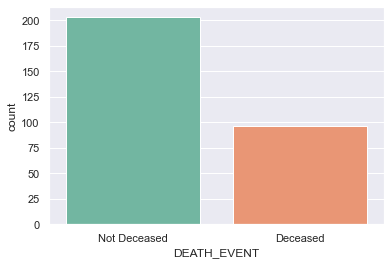

In [22]:
# Distribution Check

g= sns.countplot(df['DEATH_EVENT'], palette='Set2')
g.set(xticklabels=['Not Deceased', 'Deceased'])
plt.show()

Insight from `Univariate Analysis`:

Here are information that We can get from process above:
- The target paramater `DEATH_EVENT` is `categorical` parameter that has two unique value which is `1/Deceased` and `0/Not Deceased`
- In the dataset, the majority of the instances is category `0/Not Deceased` which fill `67.89%` of total instance.
- Hence the dataset is considered as imbalance dataset.

### Bivariate Analysis

[The purpose of bivariate analysis is to understand the relationship between two variables.](https://www.statology.org/bivariate-analysis/)

In this part of sub-process, I will try to explore some facts inside the dataset with `DEATH_EVENT` label as my focus.

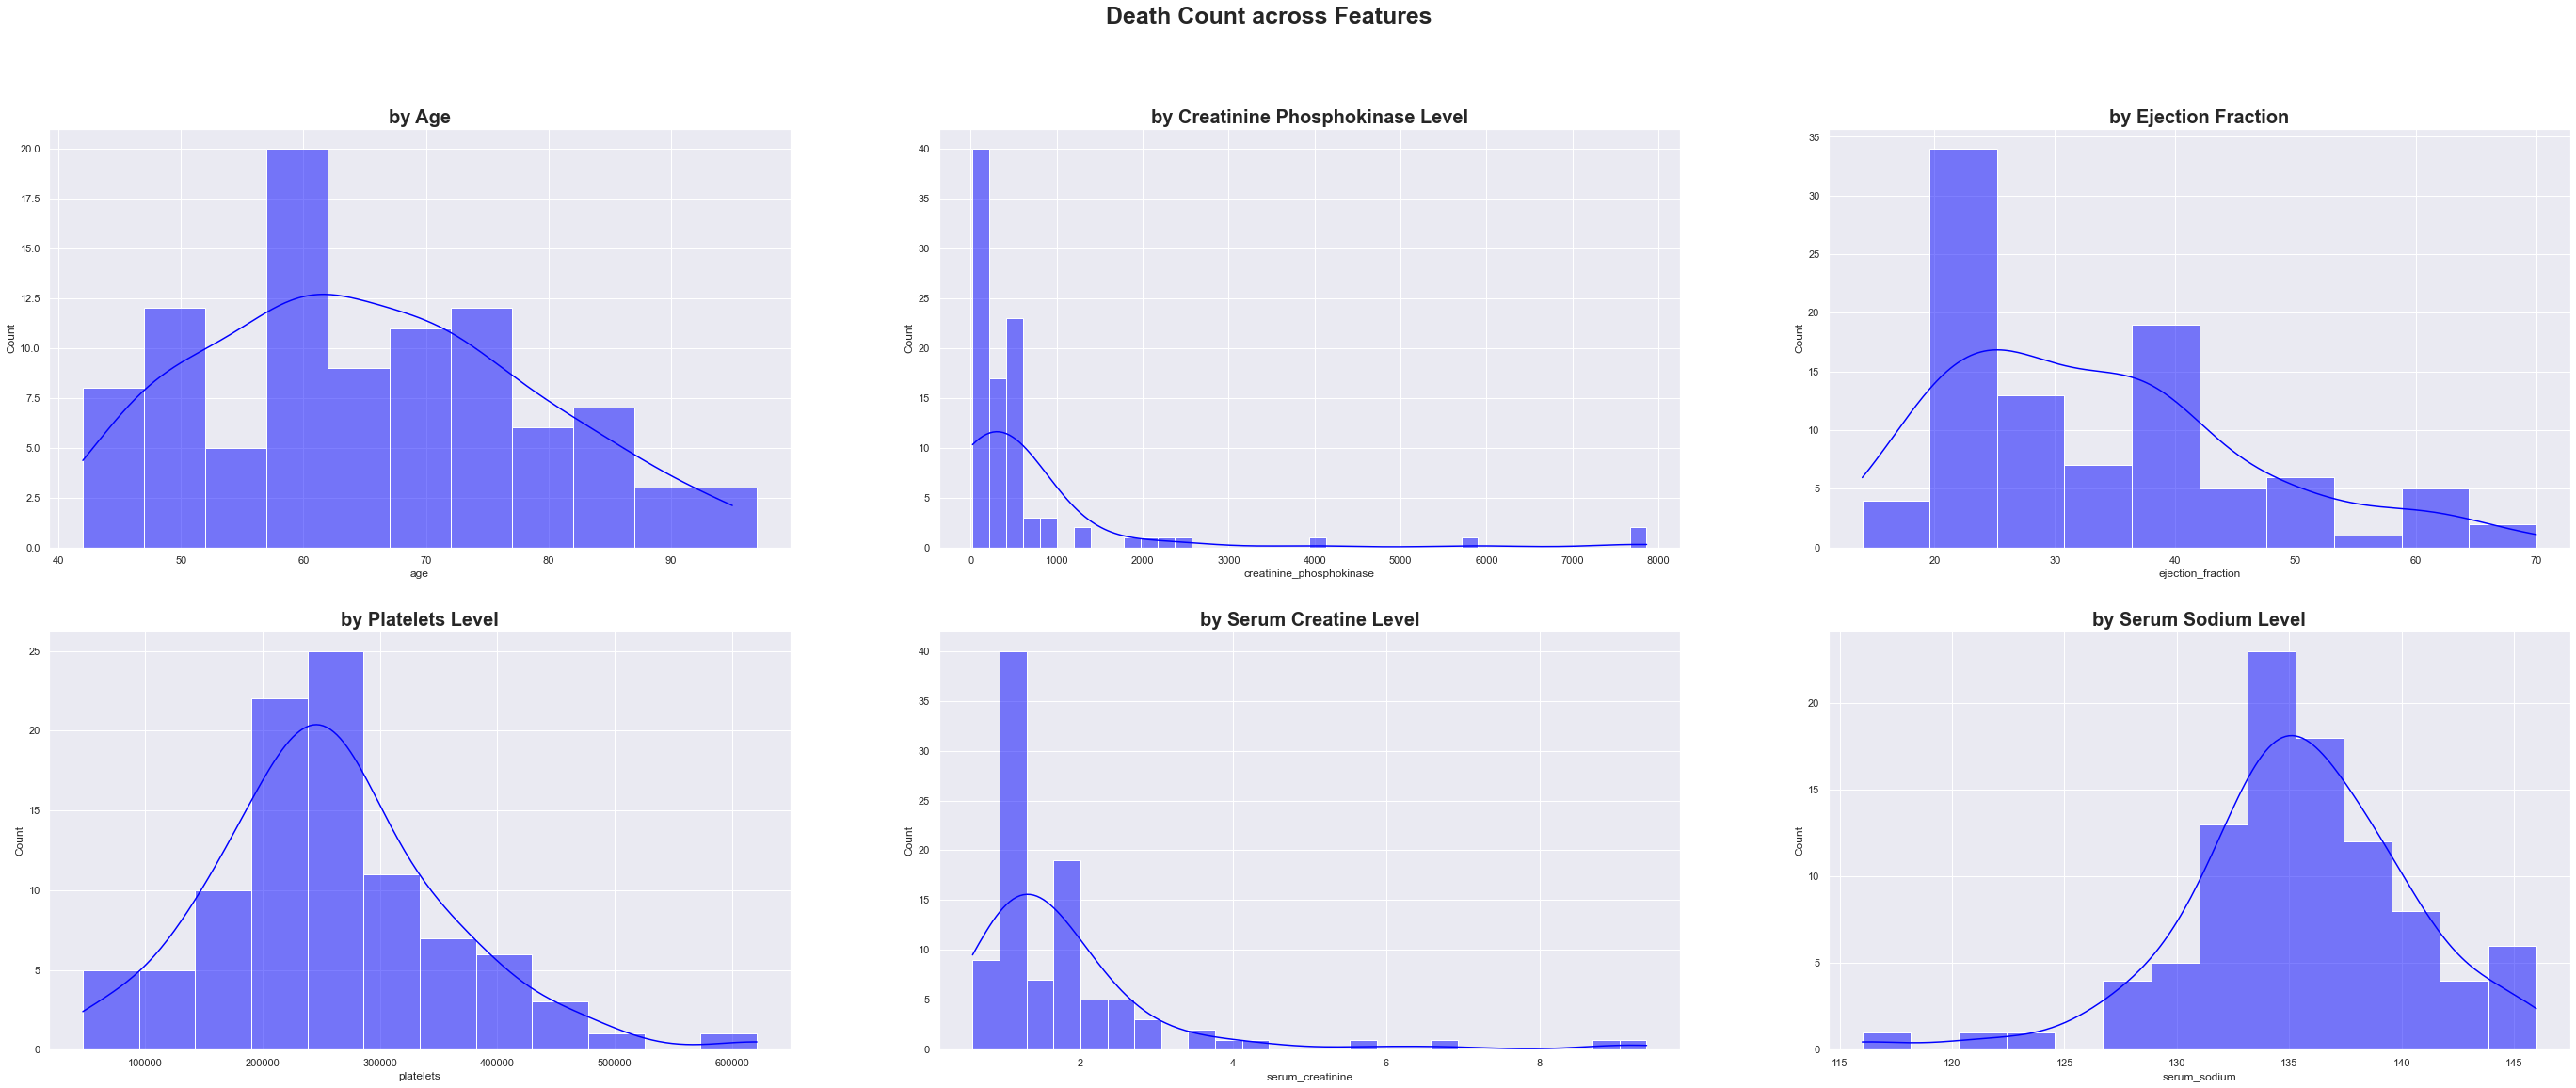

In [23]:
# Numerical Bivariate Analysis
fig, ax = plt.subplots(2,3, figsize=(24 * 2, 18))
fig.suptitle('Death Count across Features', fontsize=25, weight='bold')

graph = df[df['DEATH_EVENT'] == 1]

sns.histplot(x='age', data=graph, binwidth=5, color='blue', kde=True, stat='count', ax=ax[0,0])
ax[0,0].set_title('by Age', weight='bold', fontsize=20)

sns.histplot(x='creatinine_phosphokinase', data=graph, color='blue', kde=True, ax=ax[0,1])
ax[0,1].set_title('by Creatinine Phosphokinase Level', weight='bold', fontsize=20)

sns.histplot(x='ejection_fraction', data=graph, color='blue', kde=True, ax=ax[0,2])
ax[0,2].set_title('by Ejection Fraction', weight='bold', fontsize=20)

sns.histplot(x='platelets', data=graph, color='blue', kde=True, ax=ax[1,0])
ax[1,0].set_title('by Platelets Level', weight='bold', fontsize=20)

sns.histplot(x='serum_creatinine', data=graph, color='blue', kde=True, ax=ax[1,1])
ax[1,1].set_title('by Serum Creatine Level', weight='bold', fontsize=20)

sns.histplot(x='serum_sodium', data=graph, color='blue', kde=True, ax=ax[1,2])
ax[1,2].set_title('by Serum Sodium Level', weight='bold', fontsize=20)

plt.show()

In this part of process, I tried to explore connection of single features with the target label.\
Based on collection of graph above, We can see that:
- by `age`: 
>people with age between 50 and 70 has high `death count` with age around 60 has the highest count. It can be seen, people that pass over 80 y.o has lower `death count`, so the older the person get, doesn't necessarily mean that they are more likely to die during follow-up period.
- by `creatinine_phosphokinase` level: 
>people with low creatinine level has high `death count` compared to people with high creatinine level.
- by `ejection_fraction`: 
>people with low ejection fraction tends to get higher `death count`, this is completly make sense since `ejection_fraction` is the percentage of blood leaving the heart at each contraction. lower ejection fraction could indicates there is something wrong with the heart organ.
- by `platelets`: 
>[A normal platelet count ranges from 150,000 to 450,000 platelets per microliter of blood. Having `more than 450,000 platelets` is a condition called `thrombocytosis`; having `less than 150,000` is known as `thrombocytopenia.`](https://www.hopkinsmedicine.org/health/conditions-and-diseases/what-are-platelets-and-why-are-they-important) So, I think the graph tells us; even people with healty `platelets` level still has `DEATH_EVENT` chance caused by cardiovascular disease.
- by `serum_creatinine`:
>[A normal result is 0.7 to 1.3 mg/dL (61.9 to 114.9 µmol/L) for men and 0.6 to 1.1 mg/dL (53 to 97.2 µmol/L) for women.](https://www.mountsinai.org/health-library/tests/creatinine-blood-test#:~:text=Normal%20Results,person's%20size%20and%20muscle%20mass.) The graph tells us; even people with healthy `serum_creatinine` leve has higher risk of `DEATH_EVENT` caused by cardiovascular disease. Also from the graph we can see that there are people with extreme `serum_creatinine` level.
- by `serum_sodium`: 
>[A normal blood sodium level is between 135 and 145 milliequivalents per liter (mEq/L). Hyponatremia occurs when the sodium in your blood falls below 135 mEq/L.](https://www.mayoclinic.org/diseases-conditions/hyponatremia/symptoms-causes/syc-20373711#:~:text=A%20normal%20blood%20sodium%20level,Certain%20medications.) Based on the graph above, people with `serum_sodium` level around 135 mEq/L has highest `death count.` This could mean; even the people with normal `serum_sodium` level has equal risk to get `DEATH_EVENT` caused by cardiovascular disease.

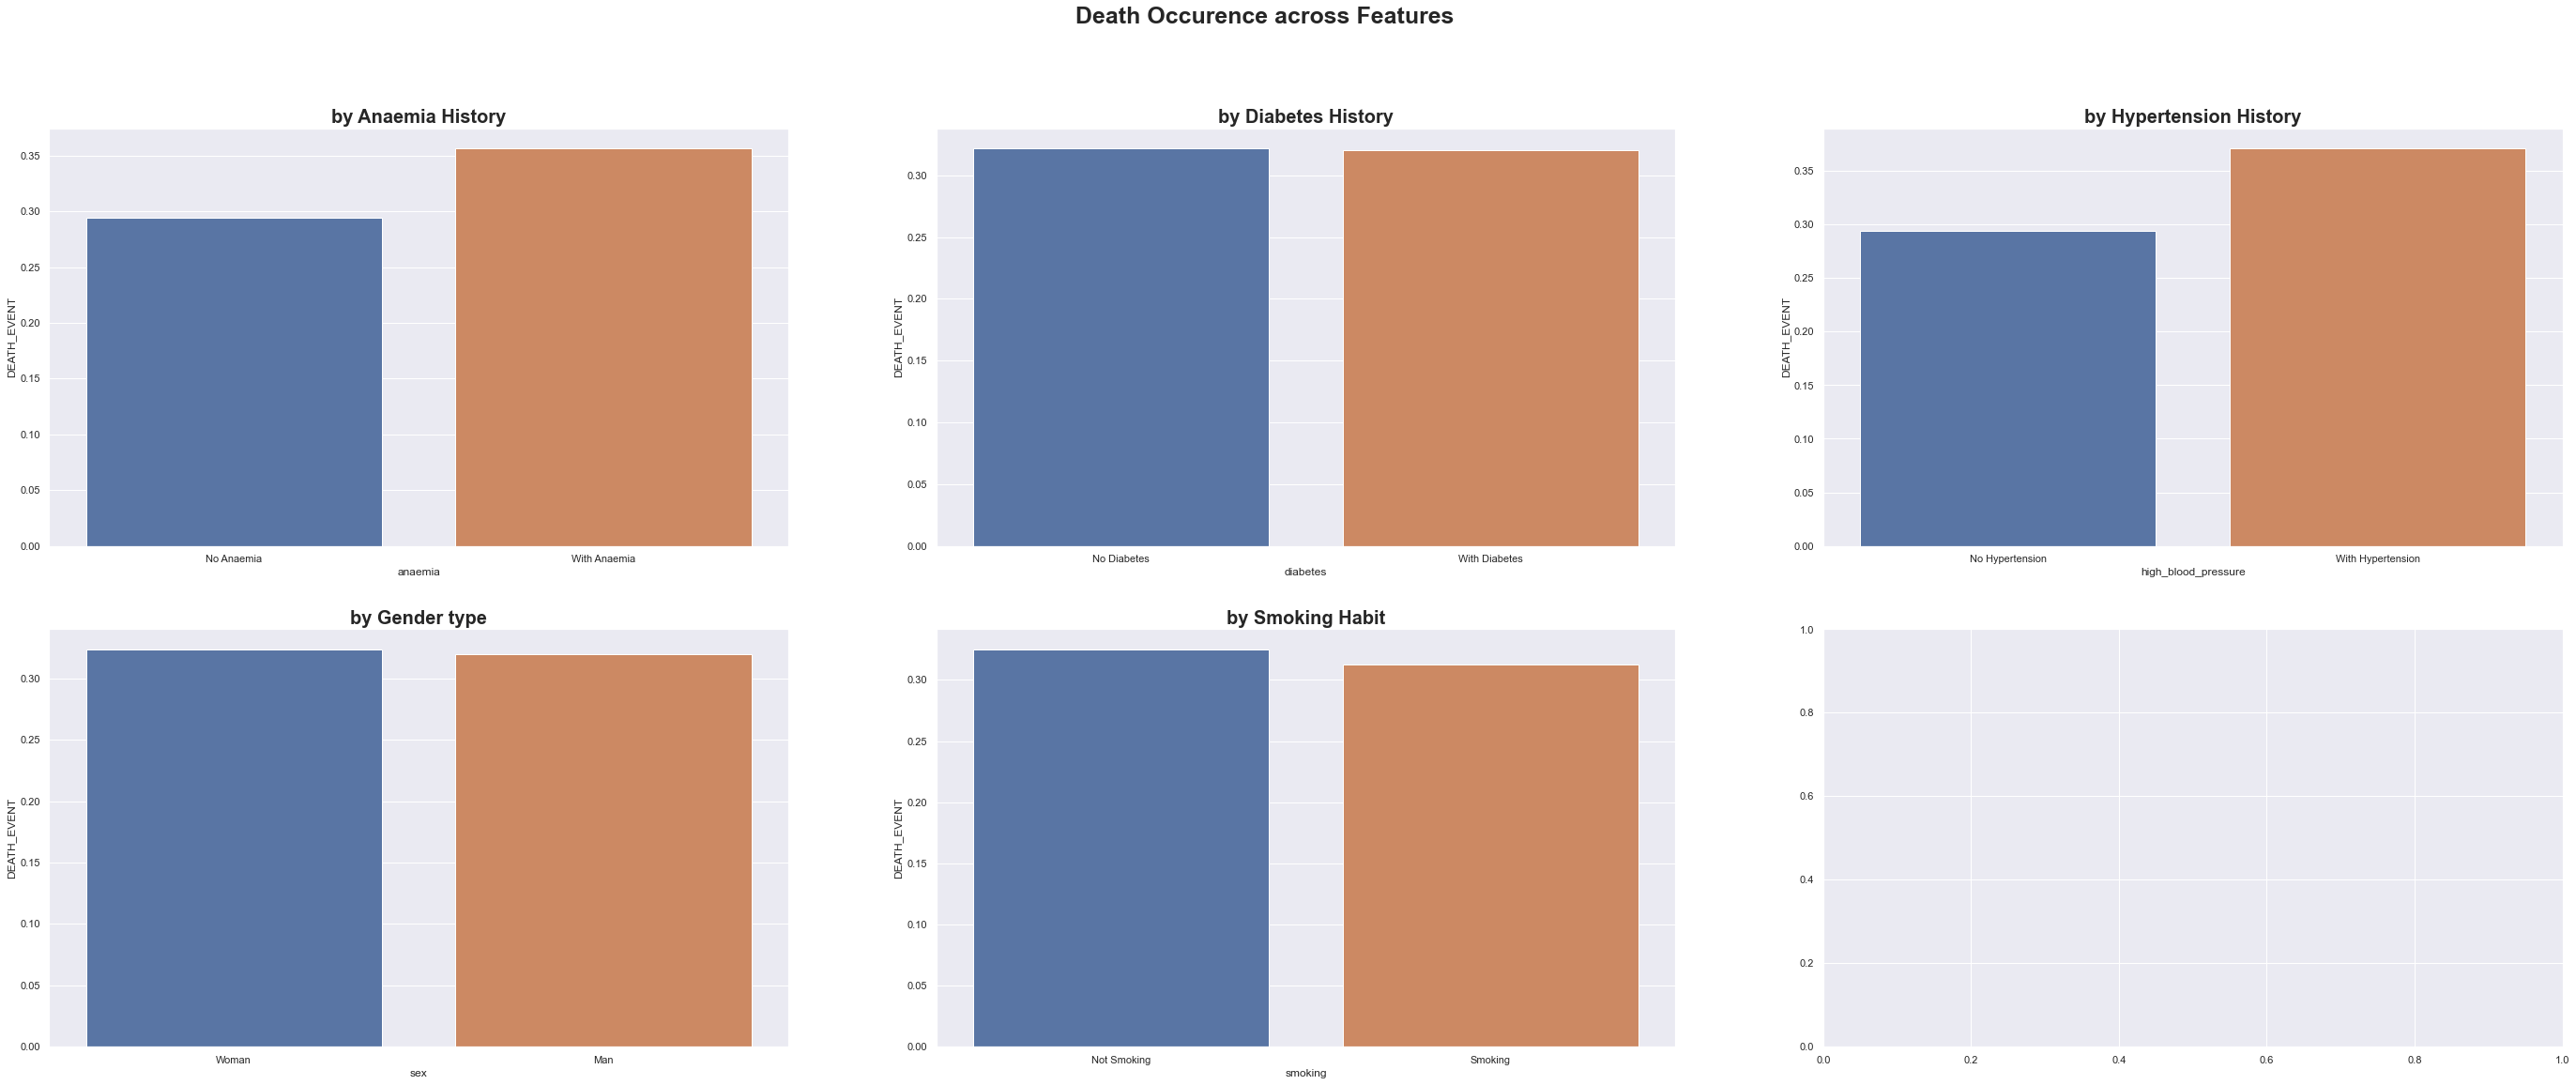

In [24]:
# Categorical Bivariate Analysis
fig, ax = plt.subplots(2,3, figsize=(24 * 2, 18))
fig.suptitle('Death Occurence across Features', fontsize=25, weight='bold')

graph1 = pd.DataFrame(df.groupby('anaemia')['DEATH_EVENT'].mean()).reset_index()
sns.barplot(x='anaemia', y='DEATH_EVENT', data=graph1, ax=ax[0,0]).set(xticklabels=['No Anaemia', 'With Anaemia'])
ax[0,0].set_title('by Anaemia History', weight='bold', fontsize=20)

graph2 = pd.DataFrame(df.groupby('diabetes')['DEATH_EVENT'].mean()).reset_index()
sns.barplot(x='diabetes', y='DEATH_EVENT', data=graph2, ax=ax[0,1]).set(xticklabels=['No Diabetes', 'With Diabetes'])
ax[0,1].set_title('by Diabetes History', weight='bold', fontsize=20)

graph3 = pd.DataFrame(df.groupby('high_blood_pressure')['DEATH_EVENT'].mean()).reset_index()
sns.barplot(x='high_blood_pressure', y='DEATH_EVENT', data=graph3, ax=ax[0,2]).set(xticklabels=['No Hypertension', 'With Hypertension'])
ax[0,2].set_title('by Hypertension History', weight='bold', fontsize=20)

graph4 = pd.DataFrame(df.groupby('sex')['DEATH_EVENT'].mean()).reset_index()
sns.barplot(x='sex', y='DEATH_EVENT', data=graph4, ax=ax[1,0]).set(xticklabels=['Woman', 'Man'])
ax[1,0].set_title('by Gender type', weight='bold', fontsize=20)

graph5 = pd.DataFrame(df.groupby('smoking')['DEATH_EVENT'].mean()).reset_index()
sns.barplot(x='smoking', y='DEATH_EVENT', data=graph5, ax=ax[1,1]).set(xticklabels=['Not Smoking', 'Smoking'])
ax[1,1].set_title('by Smoking Habit', weight='bold', fontsize=20)

plt.show()

In this part of process, I tried to explore connection of single features with the target label.\
Based on collection of graph above, We can see that:

- by `anaemia`: 
>people with `anaemia` history has `higher risk` of `DEATH_EVENT` caused by cardiovascular disease compared to people without `anaemia` history.
- by `diabetes`: 
>people with `diabetes` history has `equal risk` of `DEATH_EVENT` caused by cardiovascular disease compared to people without `diabetes` history.
- by `high_blood_pressure`: 
>people with `hypertension` history has `higher risk` of `DEATH_EVENT` caused by cardiovascular disease compared to people without `high_blood_pressure` history.
- by `sex` : 
>Either `Man` or `Woman` has `equal risk` of `DEATH_EVENT` caused by cardiovascular disease
- by `smoking`: 
>people with `smoking` habit has `equal risk` of `DEATH_EVENT` caused by cardiovascular disease compared to people without `smoking` habit.

### Multivariate  Analysis

In this part of sub-process, I will try to map the correlation between each input variable to the target variable. For this task I'll utilize the most common type of correlation coeffiecient which is `Pearson Correlation` and try to plot it in a graph.

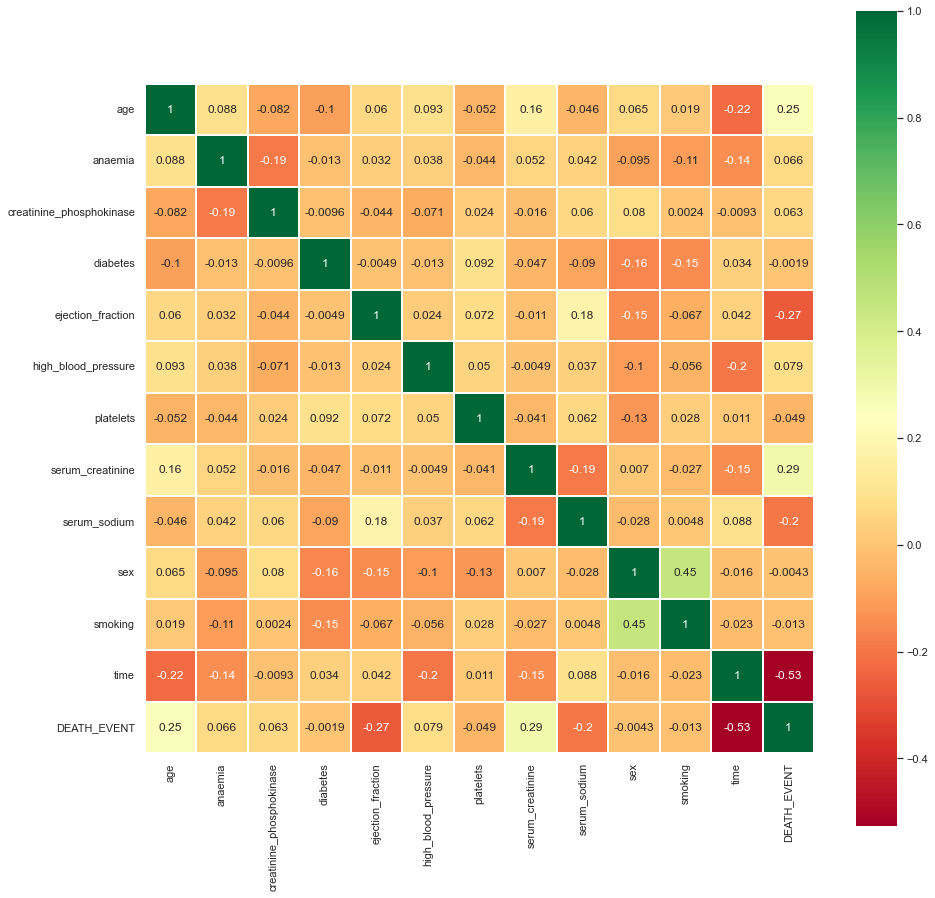

In [25]:
# Checking correlation between each variables

# Heatmap
corrmat = df.corr()
top_corr_feature = corrmat.index

plt.figure(figsize=(15,15))

g = sns.heatmap(df[top_corr_feature].corr(), annot=True, cmap='RdYlGn', square=1, linewidths=0.05)

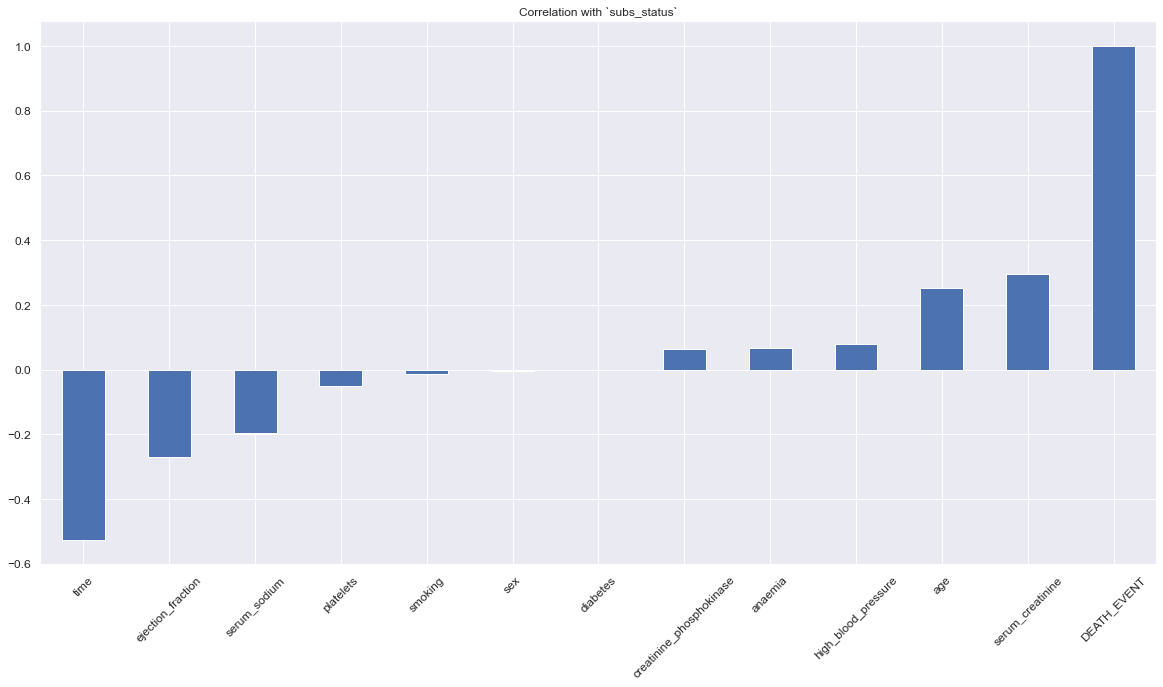

In [26]:
# Checking correlation between target variable and input variables

df.corrwith(df['DEATH_EVENT']).sort_values().plot.bar(figsize=(20,10), title='Correlation with `subs_status`', fontsize=12, rot=45, grid=True)
plt.show()

Based on graph above, I can summarize top features that correlate with `DEATH_EVENT` target label:

- top two positively correlated : `serum_creatinine, age`
- top three negatively correlated : `time, ejection_fraction, and serum_sodium`

Combining above analysis with `bivaraite analysis` in the previous process, We can get new insights here:
- From correlation above, it validates the facts that the lower `ejection_fraction` has the higher risk of `DEATH_EVENT` caused by cardiovascular disease.
- From correlation above, it validates that either man or woman has equal risk to get `DEATH_EVENT` caused by cardiovascular disease. It shown that `sex` has low correlation with `DEATH_EVENT.`
- Previously We get the fact that people with `anaemia and hypertension` history, tends to get higher risk of `DEATH_EVENT` yet those two diseases actually has low correlation with  `DEATH_EVENT` caused by cardiovascular disease.

## V. Data Preprocessing

In this process I  split my dataset into `train, test, and inference` dataset.

### Dataset Splitting

In this process, I will split my dataset into three different set:
1. Inference Set : Will be used `as if` new instance that is taken from real population.
2. Train Set : Will be used to `train` the `machine learning` model.
3. Test Set : Will be used to `test` the `machine learning` model.

I will take `16` sample for `Inference Set` and then:
1. Take 70% from reamining-dataset for `Train Set`
2. Take 30% from reamining-dataset for `Test Set`

all of those entries will be randomly selected from the dataset.

In [27]:
#Set Random State
random_state = 42

In [28]:
# Inference Set Preparation

inf_set = df.sample(16, random_state=random_state)
inf_set.shape

(16, 13)

In [29]:
# Exclude Inference Set from main dataset
train_test_set = df.drop(inf_set.index)
train_test_set.reset_index(drop=True, inplace=True)

train_test_set.shape

(283, 13)

In [30]:
# Splitting Dataset

# X will be consist of input parameter only
X = train_test_set.drop(['DEATH_EVENT'], axis=1)

# y will be consist of target parameter only
y = train_test_set['DEATH_EVENT']

In [31]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state, stratify=y)

In [32]:
# Size Summary

print('Train Set shape : ', X_train.shape)
print('Test Set shape : ', X_test.shape)
print('Inference Set shape : ', inf_set.shape)

Train Set shape :  (198, 12)
Test Set shape :  (85, 12)
Inference Set shape :  (16, 13)


### Outliers Detection

In this sub-process, I will try to identify any outliers inside each `numerical` features. Before doing the checking, I'll seperate the features into `numerical` and `categorical` features and then:

- I'll check the distribution of each variable, using skewness value. Any skewness value outside `-0.5 to 0.5` will be considered as `Skewed Distribution`, while any skewness value inside `-0.5 to 0.5` will be considered as `Normal Distribution`.
- I'll count how many outliers there in each variable. For `Normal Distribution`, I'll use `Z-score` to determine the outliers threshold. For `Skewed Distribution`, I'll use `IQR` to determine the outliers threshold.
- Summarize all the information above.

In [33]:
# column categorization
def col_categorization(df):
    global X_train_num, X_train_cat
    X_train_num = df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']]
    X_train_cat = df[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']]
    print("Generate 'X_train_num' and 'X_train_cat'")

# column categorization
col_categorization(X_train)

Generate 'X_train_num' and 'X_train_cat'


In [34]:
# Confirmation Check
X_train_num.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
9,62.0,231,25,253000.0,0.9,140,10
4,65.0,160,20,327000.0,2.7,116,8
172,75.0,99,38,224000.0,2.5,134,162
213,58.0,57,25,189000.0,1.3,132,205
34,90.0,60,50,226000.0,1.0,134,30


In [35]:
# create function to detect outliers based on distribution
def detect_outliers(df, k=1.5):
    #create dataframe with columns name : feature, distribution, outlier
    global df_outliers
    df_outliers = pd.DataFrame(columns=['col_name','distribution','bottom_limit', 'upper_limit', 'left_tail','right_tail','outliers_count','percentage'])
    #create loop for each feature
    for i in range(len(df.columns)):
        #create if statement for each distribution
        if df.iloc[:,i].skew() > -0.5 and df.iloc[:,i].skew() < 0.5 :
            #count outlier for normal distribution based on z-score
            df_outliers.loc[i] = [df.columns[i], # col_name
                                'normal', # distribution,
                                round(stats.zscore(df.iloc[:,i]).min()), # bottom limit
                                round(stats.zscore(df.iloc[:,i]).max()), # upper limit
                                df.iloc[:,i][(stats.zscore(df.iloc[:,i],nan_policy='omit'))<-3].count(), # left_tail
                                df.iloc[:,i][(stats.zscore(df.iloc[:,i],nan_policy='omit'))>3].count(), # right_tail
                                df.iloc[:,i][abs(stats.zscore(df.iloc[:,i],nan_policy='omit'))>3].count(), # outliers_count
                                df.iloc[:,i][abs(stats.zscore(df.iloc[:,i],nan_policy='omit'))>3].count()/len(df.iloc[:,i])*100] # percentage
        else:
            #count outlier for skew distribution based on IQR
            Q1 = df.iloc[:,i].quantile(0.25)
            Q3 = df.iloc[:,i].quantile(0.75)
            IQR = Q3 - Q1
            df_outliers.loc[i] = [df.columns[i], # col_name
                                'skew', # distribution,
                                Q1-k*IQR, # bottom limit
                                Q1+k*IQR, # upper limit
                                df.iloc[:,i][(df.iloc[:,i]<(Q1-1.5*IQR))].count(), # left_tail
                                df.iloc[:,i][(df.iloc[:,i]>(Q3+1.5*IQR))].count(), # right_tail
                                df.iloc[:,i][(df.iloc[:,i]<(Q1-1.5*IQR))|(df.iloc[:,i]>(Q3+1.5*IQR))].count(), # outliers_count
                                df.iloc[:,i][(df.iloc[:,i]<(Q1-1.5*IQR))|(df.iloc[:,i]>(Q3+1.5*IQR))].count()/len(df.iloc[:,i])*100] # percentage
    print('Generate df_outliers')


In [36]:
# Outliers Summary
detect_outliers(X_train_num)
df_outliers.sort_values(by='percentage',ascending=False)

Generate df_outliers


,col_name,distribution,bottom_limit,upper_limit,left_tail,right_tail,outliers_count,percentage
4,serum_creatinine,skew,0.0375,1.7625,0,19,19,9.595960
3,platelets,skew,73250.0000,352250.0000,5,13,18,9.090909
1,creatinine_phosphokinase,skew,-590.5000,816.5000,0,15,15,7.575758
5,serum_sodium,skew,126.5000,141.5000,4,1,5,2.525253
0,age,normal,-2.0000,3.0000,0,0,0,0.000000
2,ejection_fraction,normal,-2.0000,2.0000,0,0,0,0.000000
6,time,normal,-2.0000,2.0000,0,0,0,0.000000


Text(0.5, 1.0, 'serum_sodium')

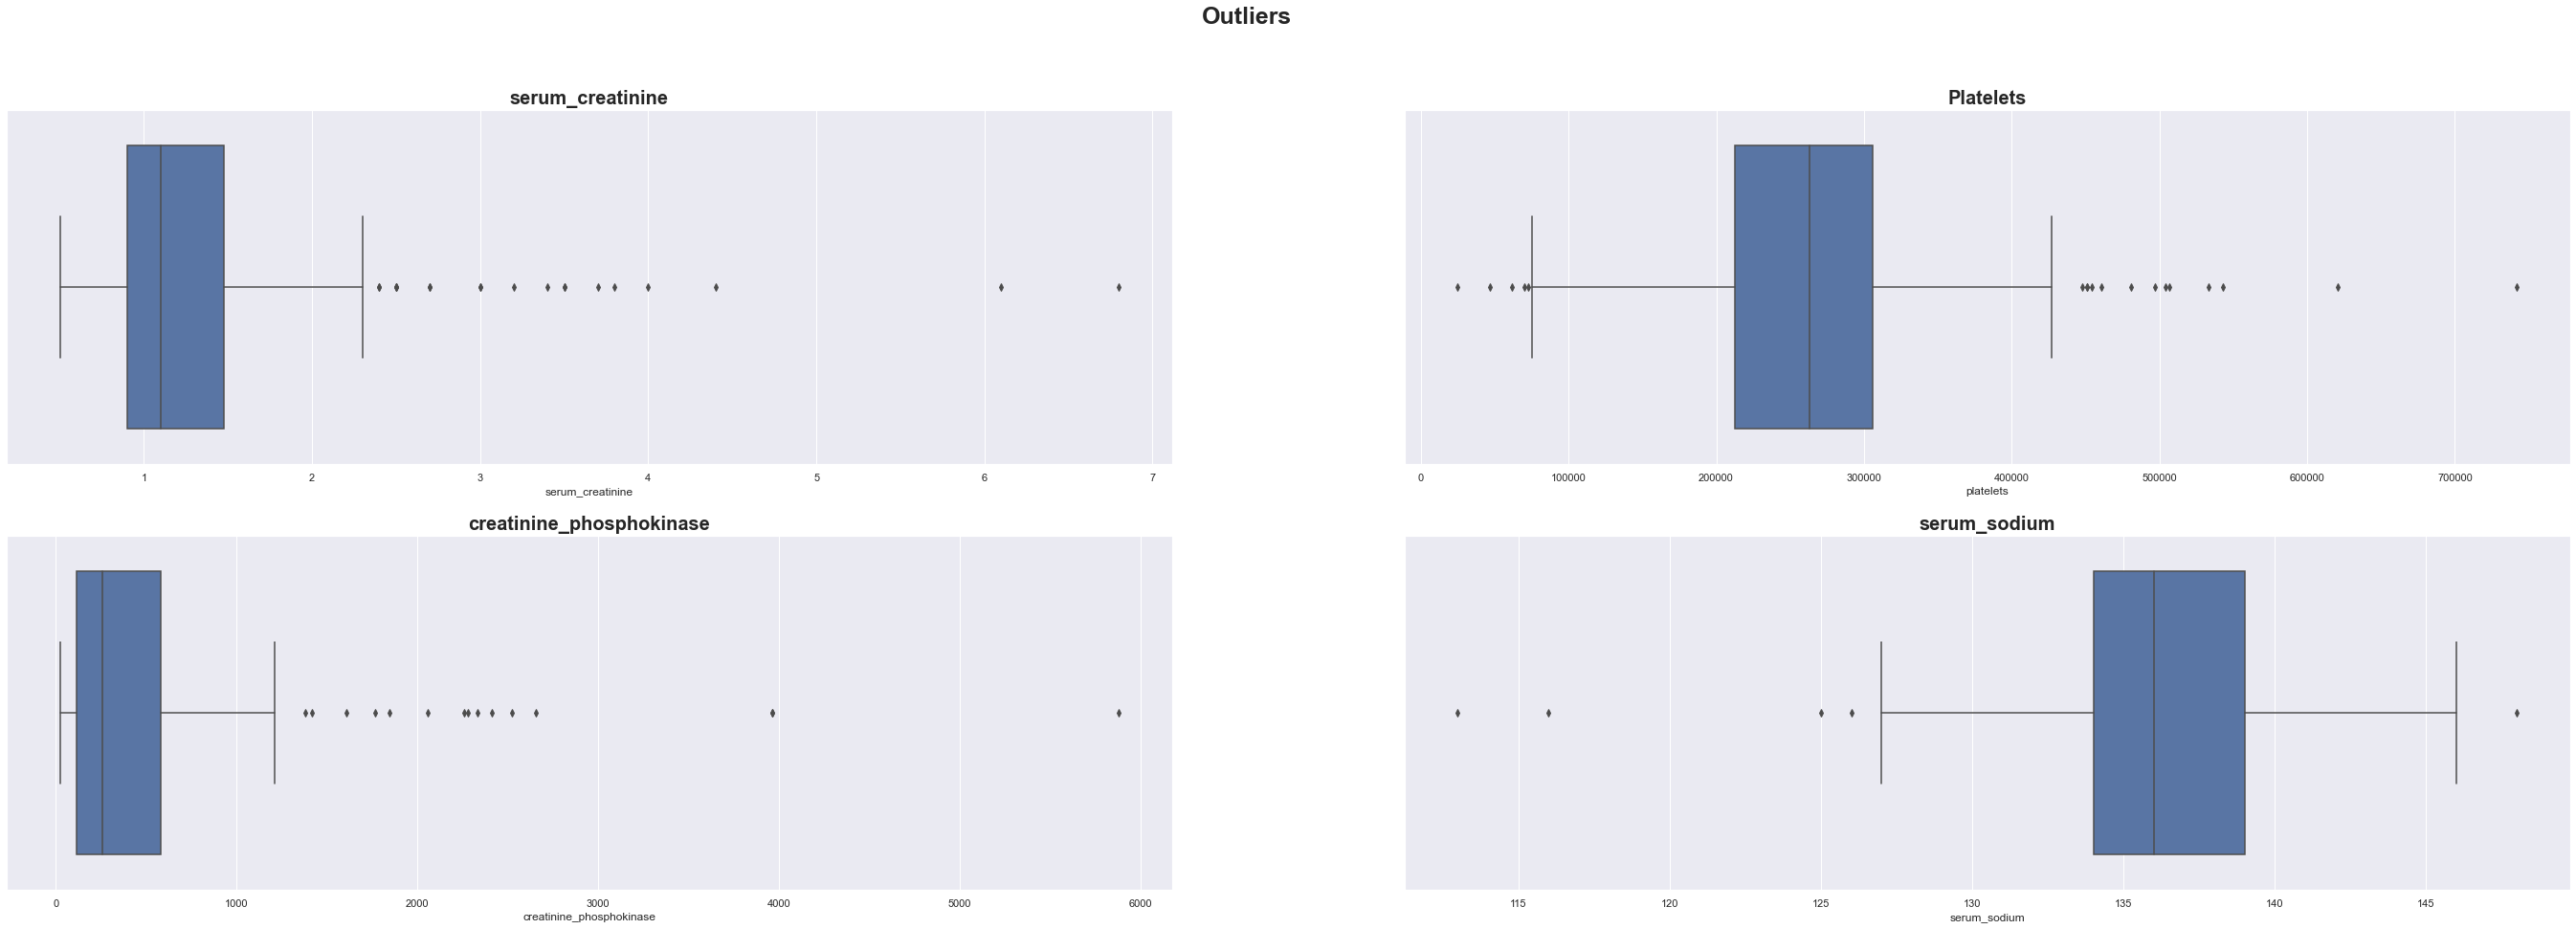

In [37]:
# Outliers Check
fig, ax = plt.subplots(2,2, figsize=(24 * 2, 15))
fig.suptitle('Outliers', fontsize=25, weight='bold')

sns.boxplot(X_train_num['serum_creatinine'], ax=ax[0,0])
ax[0,0].set_title('serum_creatinine', weight='bold', fontsize=20)

sns.boxplot(X_train_num['platelets'], ax=ax[0,1])
ax[0,1].set_title('Platelets', weight='bold', fontsize=20)

sns.boxplot(X_train_num['creatinine_phosphokinase'], ax=ax[1,0])
ax[1,0].set_title('creatinine_phosphokinase', weight='bold', fontsize=20)

sns.boxplot(X_train_num['serum_sodium'], ax=ax[1,1])
ax[1,1].set_title('serum_sodium', weight='bold', fontsize=20)

From result above, We can see that there is 4 features that is `skew distributed` and has `outliers` in it. Here is what I gonna do:
- for `serum_sodium`: 
>Since it has outliers percentage that is lower than 5% and We know that [A normal blood sodium level is between 135 and 145 milliequivalents per liter (mEq/L)](https://www.mayoclinic.org/diseases-conditions/hyponatremia/symptoms-causes/syc-20373711#:~:text=A%20normal%20blood%20sodium%20level,Certain%20medications.), I'll just let the outliers be, because the outliers is still in the safe range.

- for `serum_creatinine`:
> We know that [A normal result is 0.7 to 1.3 mg/dL (61.9 to 114.9 µmol/L) for men and 0.6 to 1.1 mg/dL (53 to 97.2 µmol/L) for women.](https://www.mountsinai.org/health-library/tests/creatinine-blood-test#:~:text=Normal%20Results,person's%20size%20and%20muscle%20mass.) and there are some patient shows extreme level of `serum_creatinine` level, so I'll cap the `serum_creatinine` to handle the outliers.

- for `platelets`:
> We know that [A normal platelet count ranges from 150,000 to 450,000 platelets per microliter of blood. Having `more than 450,000 platelets` is a condition called `thrombocytosis`; having `less than 150,000` is known as `thrombocytopenia.`](https://www.hopkinsmedicine.org/health/conditions-and-diseases/what-are-platelets-and-why-are-they-important) and there are some patient shows extreme level of `platelets` level, so I'll cap the `platelets` to handle the outliers.

- for `creatinine_phosphokinase`:
> I did not yet get clear information regarding the healthy level of `creatinine_phospokinase` level, so I'll just cap the `creatinine_phosphokinase` to handle the outliers.

In [38]:
#create function to handling outliers
def handling_outliers(exception_list):
   global X_train,y_train, norm_under_5, norm_5to15, skew_under_5, skew_5to15
   exception_list = exception_list

   norm_under_5 = df_outliers[df_outliers['distribution']=='normal'][df_outliers['percentage']<5]['col_name'].tolist()
   norm_5to15 = df_outliers[df_outliers['distribution']=='normal'][df_outliers['percentage']>5][df_outliers['percentage']<15]['col_name'].tolist()
   skew_under_5 = df_outliers[df_outliers['distribution']=='skew'][df_outliers['percentage']<5]['col_name'].tolist()
   skew_5to15 = df_outliers[df_outliers['distribution']=='skew'][df_outliers['percentage']>5][df_outliers['percentage']<15]['col_name'].tolist() 

   norm_under_5 = [x for x in norm_under_5 if x not in exception_list]
   norm_5to15 = [x for x in norm_5to15 if x not in exception_list]
   skew_under_5 = [x for x in skew_under_5 if x not in exception_list]
   skew_5to15 = [x for x in skew_5to15 if x not in exception_list]


   custom_list = ['norm_under_5','norm_over_5','skew_under_5','skew_over_5']

   for i in custom_list: 
      if i == 'norm_under_5' and len(norm_under_5)!= 0:
         
         trim_norm = OutlierTrimmer(capping_method='gaussian',
                                    tail='both', # left/right/both
                                    fold=3, # for gaussian 2 or 3
                                    variables=norm_under_5,
                                    missing_values='ignore')    
         trim_norm.fit(X_train)

         df = trim_norm.transform(X_train)
         
         #intersection of y_train and X_train index location
         y_train = y_train.loc[y_train.index.intersection(X_train.index)]

      elif i == 'norm_over_5' and len(norm_5to15)!= 0:

         winsorizer_norm = Winsorizer(capping_method='gaussian',
                                    tail='both', # left/right/both
                                    fold=3, # for gaussian 2 or 3
                                    variables=norm_5to15,
                                    missing_values='ignore')    
         winsorizer_norm.fit(X_train)

         X_train = winsorizer_norm.transform(X_train)
       
   
      elif i == 'skew_under_5'and len(skew_under_5)!= 0:
         
         trim_skew = OutlierTrimmer(capping_method='iqr',
                                    tail='both', # left/right/both
                                    fold=1.5, # for iqr 1 or 2
                                    variables=skew_under_5,
                                    missing_values='ignore')    
         trim_skew.fit(X_train)

         X_train = trim_skew.transform(X_train)

         #intersection of y_train and X_train
         y_train = y_train.loc[y_train.index.intersection(X_train.index)]
   
      elif i == 'skew_over_5' and len(skew_5to15)!= 0:

         winsorizer_skew = Winsorizer(capping_method='iqr',
                                    tail='both', # left/right/both
                                    fold=1.5, # for iqr 1 or 2
                                    variables=skew_5to15,
                                    missing_values='ignore')    
         winsorizer_skew.fit(X_train)

         X_train = winsorizer_skew.transform(X_train)

In [39]:
# Outliers Handling Summary
print('X_train Before', X_train.shape)
print('y_train Before', y_train.shape)
handling_outliers(exception_list=['serum_sodium'])
print('X_train After', X_train.shape)
print('y_train After', y_train.shape)

X_train Before (198, 12)
y_train Before (198,)
X_train After (198, 12)
y_train After (198,)


Now let's get to next process

### Missing Value Detection

In this sub-process, I will handle any missing value inside the dataset. Let's check the missing value in each parameter.

In [40]:
# create function to detect missing values

def detect_missval(df):
    global df_missval
    df_missval = pd.DataFrame(columns=['col_name','missing_count','missing_percentage'])
    for i in range(len(df.columns)):
        if df.iloc[:,i].isnull().sum() != 0:
            df_missval.loc[i] = [df.columns[i], # col_name
                                df.iloc[:,i].isnull().sum(), # missing_count
                                df.iloc[:,i].isnull().sum()/len(df.iloc[:,i])*100] # missing_percentage
    print('Generate df_missval')
    return df_missval

In [41]:
# Missing Value check
# X_train Set
detect_missval(X_train)

Generate df_missval


,col_name,missing_count,missing_percentage


In [42]:
# Missing Value check
# X_test Set
detect_missval(X_test)

Generate df_missval


,col_name,missing_count,missing_percentage


From results above, I can condlude that the dataset is free from any missing value.

### Feature Selection

In this part of sub-process, I will select input variable that will be used in `DEATH_EVENT` prediction model.

Let's see our dataset once again

In [43]:
# Dataset Check
X_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
9,62.0,0,231.0,0,25,1,253000.0,0.9000,140,1,1,10
4,65.0,1,160.0,1,20,0,327000.0,2.3375,116,0,0,8
172,75.0,0,99.0,0,38,1,224000.0,2.3375,134,1,0,162
213,58.0,1,57.0,0,25,0,189000.0,1.3000,132,1,1,205
34,90.0,1,60.0,1,50,0,226000.0,1.0000,134,1,0,30


And once again let's see the correlation matrix between each parameter

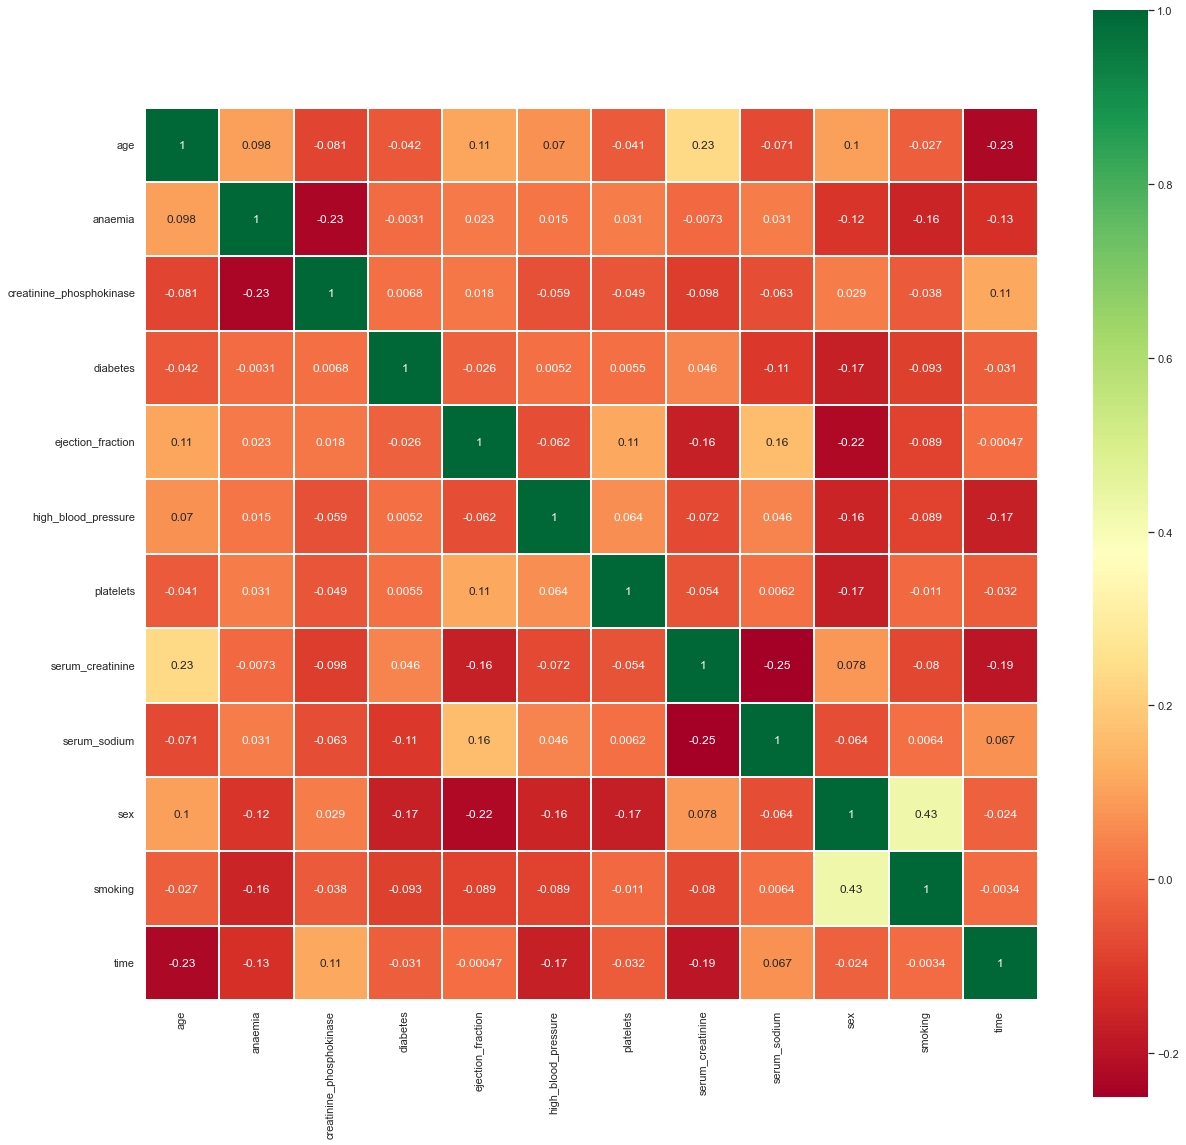

In [44]:
# Checking correlation between each parameter

# Heatmap
corrmat = X_train.corr()
top_corr_feature = corrmat.index

plt.figure(figsize=(20,20))

g = sns.heatmap(X_train[top_corr_feature].corr(), annot=True, cmap='RdYlGn', square=1, linewidths=0.05)

In this correlation matrix, every correlation between each feature are calculated. The result will be vary from `-1 to 1`, in which:
- Any value that getting closer to 1 represent strong positive correlation (symbolized with green color)
- Any value that getting closer to -1 represent strong negative correlation (symbolized with red color)
- Middle value will be 0 that represent neutral correlation (symbolized with yellow color)

Since, all features has neutral correlation, I'll select all of them as my features.

The Final model would be:

- Target Variable : `DEATH_EVENT`
- Input Variable : [`'age', 'anaemia', 'creatinine_phosphokinase', 'diabetes','ejection_fraction', 'high_blood_pressure','platelets','serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'`]

### Feature Engineering (Scaling/Encoding)

In this part of sub-process, I will make the pipeline for data preparation process.\
This process consist of `Scaling and Encoding` input variables so that it can be processed by the model.

Before start the process, I'll categorize each input variable into two different type:
Cat_nominal = [`'anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'`]\
Num_normal = [`'age', 'ejection_fraction', 'time'`]\
Num_skew = [`'creatinine_phosphokinase', 'platelets', 'serum_creatinine', 'serum_sodium'`]

And then, I'll do:
- `One Hot Encoding` for `Category_Nominal`
- `MinMax Scaling` for `Numerical with skew distribution`
- `Standard Scaling` for `Numerical with normal distribution`

In [45]:
# Column Categorization
Cat_nominal = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
Num_normal = ['age', 'ejection_fraction', 'time']
Num_skew = ['creatinine_phosphokinase', 'platelets', 'serum_creatinine', 'serum_sodium']
# Combines three categoy into one
final_features = Cat_nominal + Num_normal + Num_skew

In [46]:
# Use selected variables
X_train = X_train[final_features]
X_test = X_test[final_features]

In [47]:
# Make the Feature Engineering Pipeline
pipe_FE = ColumnTransformer([
    ('OHE', OneHotEncoder(), Cat_nominal),
    ('MinMaxScaler', MinMaxScaler(), Num_skew),
    ('StdScaler', StandardScaler(), Num_normal)
])  

## VI. Model Definition

### Model
Here is my initial `DEATH_EVENT` prediction model:

- Target Variable : `DEATH_EVENT`
- Input Variable : [`'age', 'anaemia', 'creatinine_phosphokinase', 'diabetes','ejection_fraction', 'high_blood_pressure','platelets','serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'`]

This is only initial model, it may change in the future depends on my model evaluation result.


### Algortihm
In this project I will try these Algorithm, that are:
- Bagging meta-estimator
- Random Forest
- AdaBoost
- Gradient Tree Boosting

I will find from above model, which one is the best.


### Model Evaluation (Metrics)

Since the target of this project is `classification`, I will use these error metrics for evaluating my model:
- F1 Score
- ROC-AUC Score

### Bagging meta-estimator

In [48]:
# Initial Model
BG = BaggingClassifier(DecisionTreeClassifier(),random_state=random_state, n_jobs=-1)

# Model Pipeline
pipe_BG = Pipeline([
    ('preprocessing', pipe_FE),
    ('BG', BG)
])

# Hyper parameter
params_BG = {
    'BG__max_features': [1, 2, 3, 4],
    'BG__bootstrap': [True, False],
    'BG__warm_start': [True, False]
}

### Random Forest

In [49]:
# Initial Model
RF = RandomForestClassifier(random_state=random_state, n_jobs=-1, verbose=1)

# Model Pipeline
pipe_RF = Pipeline([
    ('preprocessing', pipe_FE),
    ('RF', RF)
])

# Hyper parameter
params_RF = {
    'RF__criterion': ['gini', 'entropy'],
    'RF__min_samples_split': [2, 4, 8, 16, 32, 64],
    'RF__max_features': ['auto', 'sqrt', 'log2']
}

### AdaBoost

In [50]:
# Initial Model
Ada = AdaBoostClassifier(random_state=random_state)

# Model Pipeline
pipe_Ada = Pipeline([
    ('preprocessing', pipe_FE),
    ('Ada', Ada)
])

# Hyper parameter
params_Ada = {
    'Ada__n_estimators': [10, 50, 100, 200, 500],
    'Ada__learning_rate': [0.1, 0.5, 1, 10, 50, 100],
    'Ada__algorithm': ['SAMME', 'SAMME.R']
}

### Gradient Tree Boosting

In [51]:
# Initial Model
GTB = AdaBoostClassifier(random_state=random_state)

# Model Pipeline
pipe_GTB = Pipeline([
    ('preprocessing', pipe_FE),
    ('GTB', GTB)
])

# Hyper parameter
params_GTB = {
    'GTB__loss': ['deviance', 'exponential'],
    'GTB__n_estimators': [10, 50, 100, 200, 500],
    'GTB__learning_rate': [0.1, 0.5, 1, 10, 50, 100]
}

## VII. Model Training

### Cross-Validation Process

In this part of sub-process, I will use `Cross-Validation` to evaluate my base model and find which one is the best.

Since we know that our dataset is categorized as `imbalance` dataset, I'll use `f1_macro` scoring method so the model can see both as class as `equal` regardless their size. 

In [52]:
# Cross-validate base model

# prepare models and put it into list
models = []
models.append(('BG', pipe_BG))
models.append(('RF', pipe_RF))
models.append(('Ada', pipe_Ada))
models.append(('GTB', pipe_GTB))

# Create empty list to stores result
names = []
results = []
mean_score = []
stdev_score = []

# Cross-validate each model
for name, model in models:
    model.fit(X_train,y_train)
    scores = cross_val_score(model, X_train, y_train, scoring='f1_macro', cv=5, n_jobs=-1)

    names.append(name)
    results.append(scores)
    mean_score.append(round(np.mean(scores),4))
    stdev_score.append(round(np.std(scores),4))

cv_result = pd.DataFrame({'models':names, 'mean_score':mean_score, 'stdev_score':stdev_score})

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished


## VIII. Model Evaluation

In this part of process, I will try to evaluate the trained model and make conclusion out of it.

In [53]:
# Showing the result
cv_result.sort_values(by='mean_score', ascending=False)

,models,mean_score,stdev_score
1,RF,0.8105,0.0874
2,Ada,0.7776,0.0953
3,GTB,0.7776,0.0953
0,BG,0.7594,0.0820


Based on result above, we can see the top model is `Random Forest`, it has the best `mean_score`, but the lowest `stdev_score` is acquired by `Bagging meta-estimator`. So basically `Bagging meta-estimator` is realatively more accurate than `Random Forest`.

Despite the ranking above, In my opinion all of those models are perform similarly well (except `Random Forest`). I decided to chose `Random Forest, AdaBoost, and Gradient Tree Boosting` algorithm and tune it and compare it again.

### Hyper Parameter Tuning for the Best Model - Random Forest

In [54]:
# Hyperparameter tuning
grid_RF = GridSearchCV(
    pipe_RF, params_RF, cv=5, scoring='f1_macro', n_jobs=-1, verbose=1
).fit(X_train, y_train)

best_params_RF = grid_RF.best_params_
best_pipe_RF = grid_RF.best_estimator_
df_result_RF = pd.DataFrame.from_dict(grid_RF.cv_results_, orient='columns')

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [55]:
# Show best parameter for Model
best_params_RF

{'RF__criterion': 'entropy',
 'RF__max_features': 'auto',
 'RF__min_samples_split': 32}

Based on result above, the best hyper parameter setting for `Random Forest` are:
- criterion: `entropy`
- min_samples_split: `auto`
- max_features: `32`

### Hyper Parameter Tuning for the Best Model - AdaBoost

In [56]:
# Hyperparameter tuning
grid_Ada = GridSearchCV(
    pipe_Ada, params_Ada, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1
).fit(X_train, y_train)

best_params_Ada = grid_Ada.best_params_
best_pipe_Ada = grid_Ada.best_estimator_
df_result_Ada = pd.DataFrame.from_dict(grid_Ada.cv_results_, orient='columns')

Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [57]:
# Show best parameter for Model
best_params_Ada

{'Ada__algorithm': 'SAMME',
 'Ada__learning_rate': 0.1,
 'Ada__n_estimators': 100}

Based on result above, the best hyper parameter setting for `AdaBoost` are:
- algorithm: `SAMME`
- learning_rate: `0.1`
- n_estimators: `100`

### Hyper Parameter Tuning for the Best Model - Bagging meta-estimator

In [58]:
# Hyperparameter tuning
grid_BG = GridSearchCV(
    pipe_BG, params_BG, cv=5, scoring='f1_macro', n_jobs=-1, verbose=1
).fit(X_train, y_train)

best_params_BG = grid_BG.best_params_
best_pipe_BG = grid_BG.best_estimator_
df_result_BG = pd.DataFrame.from_dict(grid_BG.cv_results_, orient='columns')

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [59]:
# Show best parameter for Model
best_params_BG

{'BG__bootstrap': True, 'BG__max_features': 4, 'BG__warm_start': True}

Based on result above, the best hyper parameter setting for `Bagging meta-estimator` are:
- bootsrap: `True`
- max_features: `4`
- warm_start: `True`

### Model Evaluation - Random Forest

In [60]:
#Performance Metrics
print('==================== Train Results (Random Forest) ====================')
print(classification_report(y_train, best_pipe_RF.predict(X_train), target_names=['Not Deceased', 'Deceased']))

print('==================== Test Results (Random Forest) ====================')
print(classification_report(y_test, best_pipe_RF.predict(X_test), target_names=['Not Deceased', 'Deceased']))

==================== Train Results (Random Forest) ====================
              precision    recall  f1-score   support

Not Deceased       0.88      0.96      0.92       136
    Deceased       0.88      0.73      0.80        62

    accuracy                           0.88       198
   macro avg       0.88      0.84      0.86       198
weighted avg       0.88      0.88      0.88       198

==================== Test Results (Random Forest) ====================
              precision    recall  f1-score   support

Not Deceased       0.84      0.93      0.89        58
    Deceased       0.81      0.63      0.71        27

    accuracy                           0.84        85
   macro avg       0.83      0.78      0.80        85
weighted avg       0.83      0.84      0.83        85



[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


In [61]:
#Performance Metrics
print('==================== Train Results (Random Forest) ====================')
print(roc_auc_score(y_train, best_pipe_RF.predict(X_train)))

print('==================== Test Results (Random Forest) ====================')
print(roc_auc_score(y_test, best_pipe_RF.predict(X_test)))

==================== Train Results (Random Forest) ====================


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s


0.8408444022770398
==================== Test Results (Random Forest) ====================
0.7803320561941253


[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


**Performance Summary - Random Forest**

Based on result above, I can say that 
- If We focus on `f1_macro score`, We can see that the model has 6% differences between training phase and test phase.
- If We focus on `roc_auc_score`, We can see that the model has around 6% differences between training phase and test phase.
- Because the differences is higher than 5%, I can assume that the model is `overfitting.`

### Model Evaluation - AdaBoost

In [62]:
#Performance Metrics
print('==================== Train Results (AdaBoost) ====================')
print(classification_report(y_train, best_pipe_Ada.predict(X_train), target_names=['Not Deceased', 'Deceased']))

print('==================== Test Results (AdaBoost) ====================')
print(classification_report(y_test, best_pipe_Ada.predict(X_test), target_names=['Not Deceased', 'Deceased']))

==================== Train Results (AdaBoost) ====================
              precision    recall  f1-score   support

Not Deceased       0.87      0.96      0.91       136
    Deceased       0.88      0.69      0.77        62

    accuracy                           0.87       198
   macro avg       0.88      0.82      0.84       198
weighted avg       0.87      0.87      0.87       198

==================== Test Results (AdaBoost) ====================
              precision    recall  f1-score   support

Not Deceased       0.84      0.93      0.89        58
    Deceased       0.81      0.63      0.71        27

    accuracy                           0.84        85
   macro avg       0.83      0.78      0.80        85
weighted avg       0.83      0.84      0.83        85



In [63]:
#Performance Metrics
print('==================== Train Results (AdaBoost) ====================')
print(roc_auc_score(y_train, best_pipe_Ada.predict(X_train)))

print('==================== Test Results (AdaBoost) ====================')
print(roc_auc_score(y_test, best_pipe_Ada.predict(X_test)))

==================== Train Results (AdaBoost) ====================
0.8247153700189753
==================== Test Results (AdaBoost) ====================
0.7803320561941253


**Performance Summary - AdaBoost**

Based on result above, I can say that 
- If We focus on `f1_macro score`, We can see that the model has 4% differences between training phase and test phase.
- If We focus on `roc_auc_score`, We can see that the model has around 4% differences between training phase and test phase.
- Because the differences is less than 5%, I can assume that the model is `good fit` with tendency to overfit.

### Model Evaluation - Bagging meta-estimator

In [64]:
#Performance Metrics
print('==================== Train Results (Bagging) ====================')
print(classification_report(y_train, best_pipe_BG.predict(X_train), target_names=['Not Deceased', 'Deceased']))

print('==================== Test Results (Bagging) ====================')
print(classification_report(y_test, best_pipe_BG.predict(X_test), target_names=['Not Deceased', 'Deceased']))

==================== Train Results (Bagging) ====================
              precision    recall  f1-score   support

Not Deceased       0.94      1.00      0.97       136
    Deceased       1.00      0.87      0.93        62

    accuracy                           0.96       198
   macro avg       0.97      0.94      0.95       198
weighted avg       0.96      0.96      0.96       198

==================== Test Results (Bagging) ====================
              precision    recall  f1-score   support

Not Deceased       0.81      0.95      0.87        58
    Deceased       0.82      0.52      0.64        27

    accuracy                           0.81        85
   macro avg       0.82      0.73      0.75        85
weighted avg       0.81      0.81      0.80        85



In [65]:
#Performance Metrics
print('==================== Train Results (Bagging) ====================')
print(roc_auc_score(y_train, best_pipe_BG.predict(X_train)))

print('==================== Test Results (Bagging) ====================')
print(roc_auc_score(y_test, best_pipe_BG.predict(X_test)))

==================== Train Results (Bagging) ====================
0.935483870967742
==================== Test Results (Bagging) ====================
0.7333971902937421


**Performance Summary - Bagging meta-estimator**

Based on result above, I can say that 
- If We focus on `f1_macro score`, We can see that the model has 20% differences between training phase and test phase.
- If We focus on `roc_auc_score`, We can see that the model has around 20% differences between training phase and test phase.
- Because the differences is greater than 5%, I can assume that the model is `overfitting.`

### Final Conclusion
- Both `Random Forest` and `Bagging meta-estimator` model is `overfitting`, while `AdaBoost` model is `good fit.`
- Because the dataset is `imbalance,` the prediction models tends to predict `DEATH_EVENT` as `Not Deceased` rahter than `Deceased`. This can bee seen from f1_score on `Not Deceased` class which is higher than f1_score on `Deceased` class.

Since the only model that able to be considered as `goodfit` is only `AdaBoost`, I'll use it as my final model.

## IX. Model Inference
In this part of process, I will try to feed the machine learning model using the `Inference Set` and see how it perform.

Before feeding the set into the model, We need to do exact same process of `Missing value handling, Feature selection and engineering` process to the `Inference Set`

In [66]:
# Missing Value Check
inf_set.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Looks like there is no missing value here, let's continue the process.

In [67]:
# Splitting Dataset

# X will be consist of input parameter only
X_inf = inf_set.drop(['DEATH_EVENT'], axis=1)

# use same variables in final features
X_inf = X_inf[final_features]

# y will be consist of target parameter only
y_inf = inf_set['DEATH_EVENT']


### Prediction

In [68]:
# Determines prediction result
y_inf_pred = best_pipe_Ada.predict(X_inf)

### Evaluation

In [69]:
# Evaluation for inference set
print('==================== Inference Results (AdaBoost) ====================')
print(classification_report(y_inf, y_inf_pred, target_names=['Not Deceased', 'Deceased']))

==================== Inference Results (AdaBoost) ====================
              precision    recall  f1-score   support

Not Deceased       0.67      0.89      0.76         9
    Deceased       0.75      0.43      0.55         7

    accuracy                           0.69        16
   macro avg       0.71      0.66      0.65        16
weighted avg       0.70      0.69      0.67        16



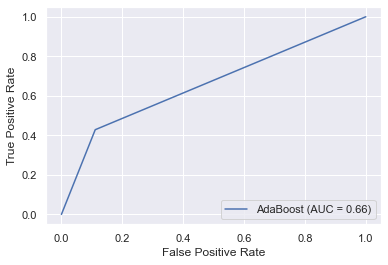

In [70]:
# Plot ROC-AUC curve
y = np.array(y_inf)
pred = np.array(y_inf_pred)

fpr, tpr, thresholds = roc_curve(y, pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='AdaBoost')
display.plot()

plt.show()

In [71]:
print('==================== Inference Results (AdaBoost) ====================')
print(roc_auc_score(y_inf, best_pipe_Ada.predict(X_inf)))

==================== Inference Results (AdaBoost) ====================
0.6587301587301587


### Inference Process Evaluation

From above process, We can see that:
- If We focus on f1_score, I can say that the model perform way worse than on training and test phase.
- Although it perform worse, but if we focus on `precision and recall` score, I can say that my model is quite good. why?\
because it has `low false negative` count.
- Low false negative count means the model is less likely to mistakenly predict a healthy person as a `Deceased` person. It can be seen on higher `recall` score than `precision` score.
- From the `ROC-AUC Score`, I can say that the model is `quite capable` of predicting `DEATH_EVENT` on person/patient.


## X. Conclusion

Here all the conclusion that I get from this project

## EDA Analysis

**Univariate Analysis**
- The target paramater `DEATH_EVENT` is `categorical` parameter that has two unique value which is `1/Deceased` and `0/Not Deceased`
- In the dataset, the majority of the instances is category `0/Not Deceased` which fill `67.89%` of total instance.
- Hence the dataset is considered as imbalance dataset.


**Bivariate Analysis**

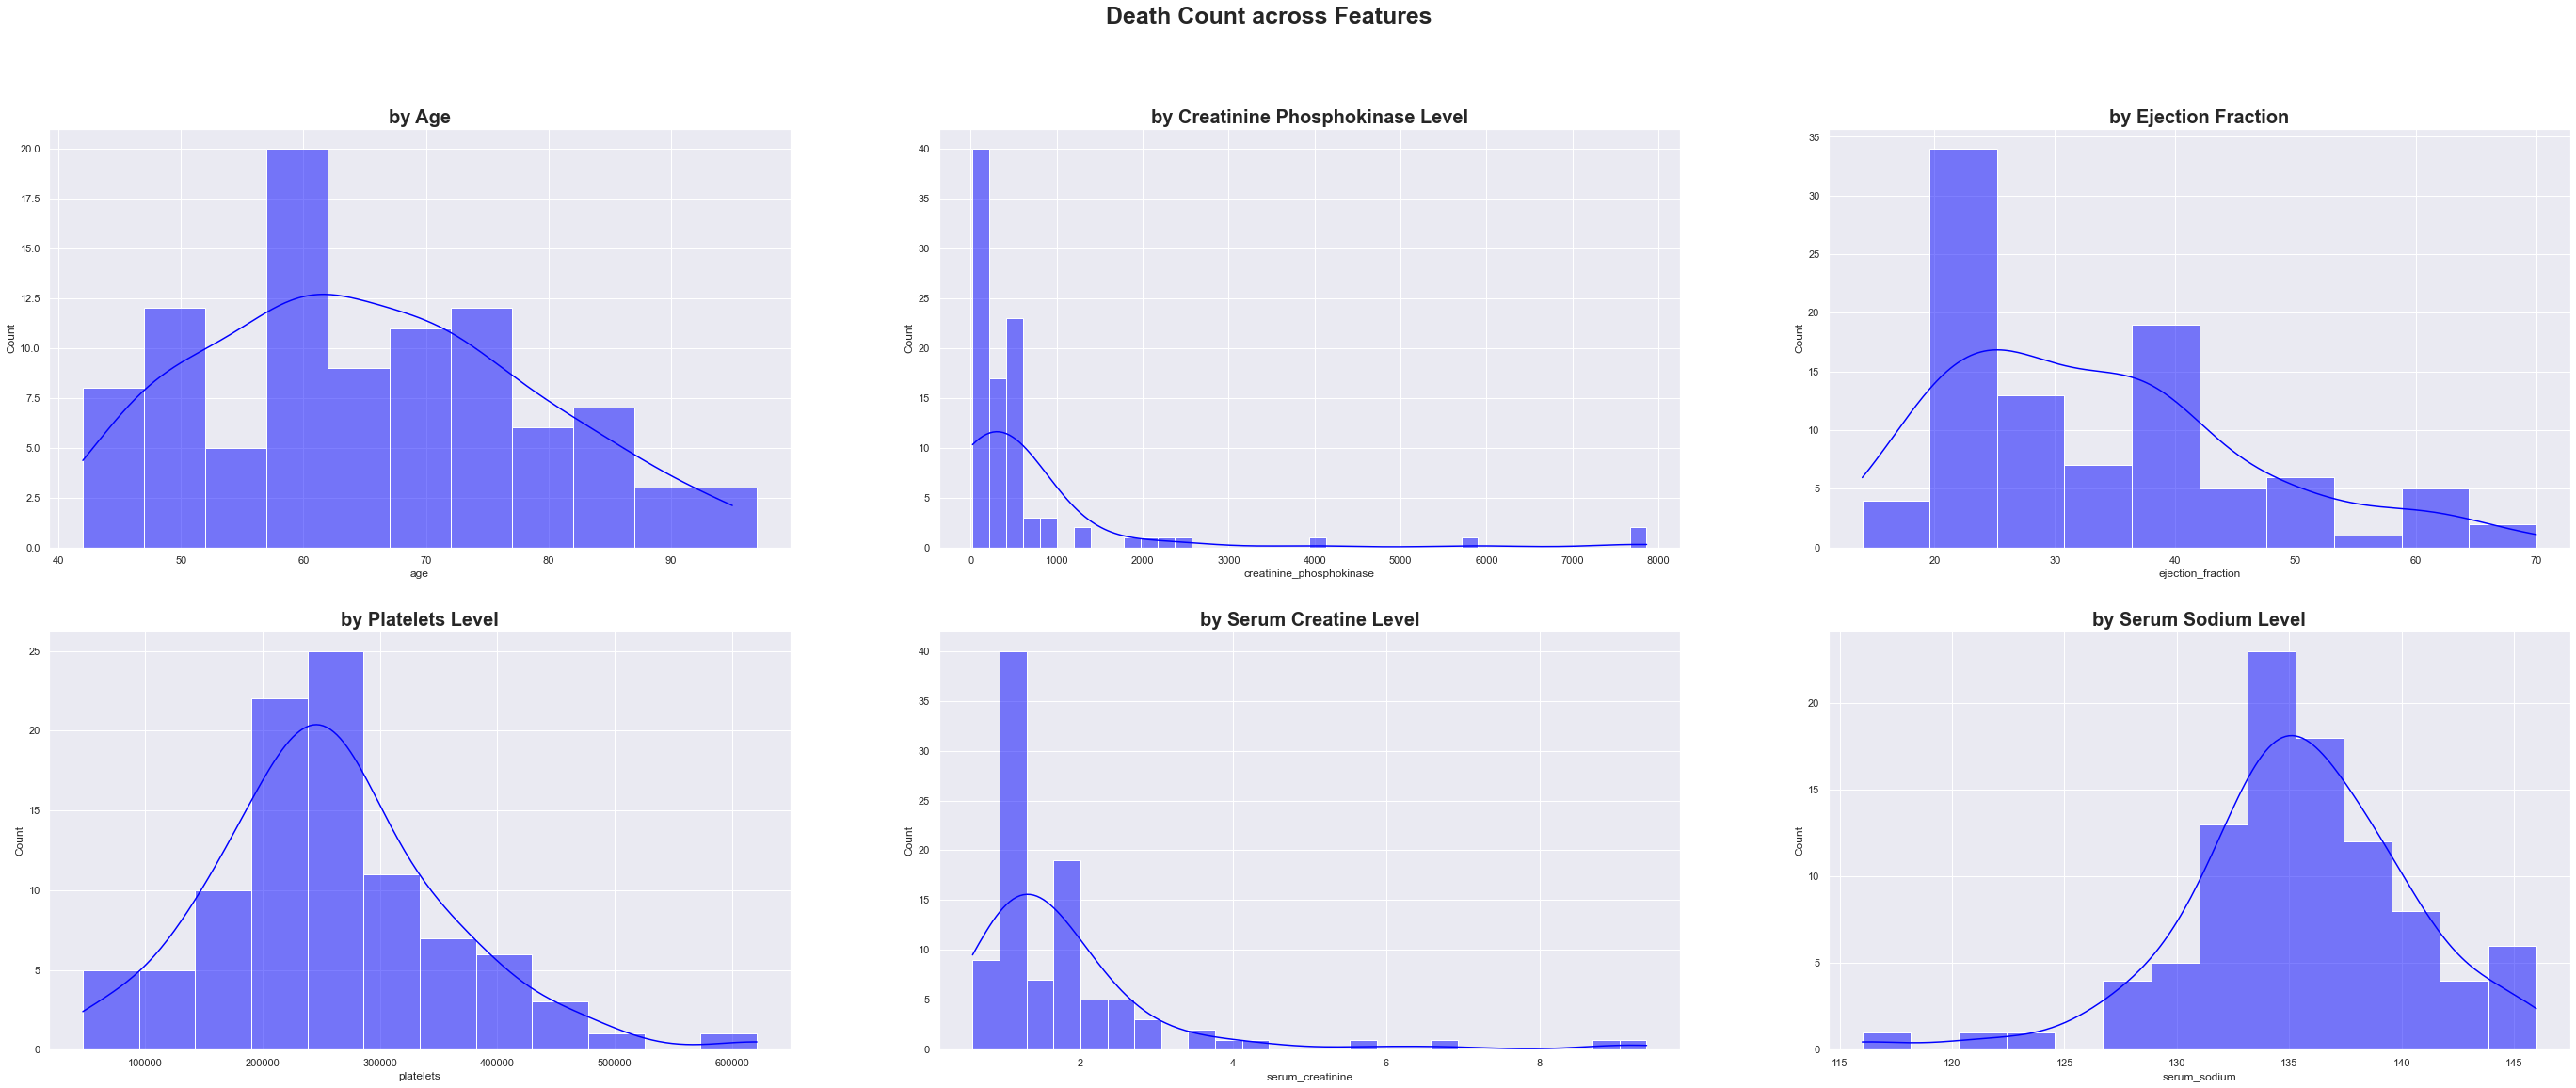

In [72]:
# Numerical Bivariate Analysis
fig, ax = plt.subplots(2,3, figsize=(24 * 2, 18))
fig.suptitle('Death Count across Features', fontsize=25, weight='bold')

graph = df[df['DEATH_EVENT'] == 1]

sns.histplot(x='age', data=graph, binwidth=5, color='blue', kde=True, stat='count', ax=ax[0,0])
ax[0,0].set_title('by Age', weight='bold', fontsize=20)

sns.histplot(x='creatinine_phosphokinase', data=graph, color='blue', kde=True, ax=ax[0,1])
ax[0,1].set_title('by Creatinine Phosphokinase Level', weight='bold', fontsize=20)

sns.histplot(x='ejection_fraction', data=graph, color='blue', kde=True, ax=ax[0,2])
ax[0,2].set_title('by Ejection Fraction', weight='bold', fontsize=20)

sns.histplot(x='platelets', data=graph, color='blue', kde=True, ax=ax[1,0])
ax[1,0].set_title('by Platelets Level', weight='bold', fontsize=20)

sns.histplot(x='serum_creatinine', data=graph, color='blue', kde=True, ax=ax[1,1])
ax[1,1].set_title('by Serum Creatine Level', weight='bold', fontsize=20)

sns.histplot(x='serum_sodium', data=graph, color='blue', kde=True, ax=ax[1,2])
ax[1,2].set_title('by Serum Sodium Level', weight='bold', fontsize=20)

plt.show()

Based on collection of graph above, We can see that:

- by `age`: 
>people with age between 50 and 70 has high `death count` with age around 60 has the highest count. It can be seen, people that pass over 80 y.o has lower `death count`, so the older the person get, doesn't necessarily mean that they are more likely to die during follow-up period.
- by `creatinine_phosphokinase` level: 
>people with low creatinine level has high `death count` compared to people with high creatinine level.
- by `ejection_fraction`: 
>people with low ejection fraction tends to get higher `death count`, this is completly make sense since `ejection_fraction` is the percentage of blood leaving the heart at each contraction. lower ejection fraction could indicates there is something wrong with the heart organ.
- by `platelets`: 
>[A normal platelet count ranges from 150,000 to 450,000 platelets per microliter of blood. Having `more than 450,000 platelets` is a condition called `thrombocytosis`; having `less than 150,000` is known as `thrombocytopenia.`](https://www.hopkinsmedicine.org/health/conditions-and-diseases/what-are-platelets-and-why-are-they-important) So, I think the graph tells us; even people with healty `platelets` level still has `DEATH_EVENT` chance caused by cardiovascular disease.
- by `serum_creatinine`:
>[A normal result is 0.7 to 1.3 mg/dL (61.9 to 114.9 µmol/L) for men and 0.6 to 1.1 mg/dL (53 to 97.2 µmol/L) for women.](https://www.mountsinai.org/health-library/tests/creatinine-blood-test#:~:text=Normal%20Results,person's%20size%20and%20muscle%20mass.) The graph tells us; even people with healthy `serum_creatinine` leve has higher risk of `DEATH_EVENT` caused by cardiovascular disease. Also from the graph we can see that there are people with extreme `serum_creatinine` level.
- by `serum_sodium`: 
>[A normal blood sodium level is between 135 and 145 milliequivalents per liter (mEq/L). Hyponatremia occurs when the sodium in your blood falls below 135 mEq/L.](https://www.mayoclinic.org/diseases-conditions/hyponatremia/symptoms-causes/syc-20373711#:~:text=A%20normal%20blood%20sodium%20level,Certain%20medications.) Based on the graph above, people with `serum_sodium` level around 135 mEq/L has highest `death count.` This could mean; even the people with normal `serum_sodium` level has equal risk to get `DEATH_EVENT` caused by cardiovascular disease.

Text(0.5, 1.0, 'by Smoking Habit')

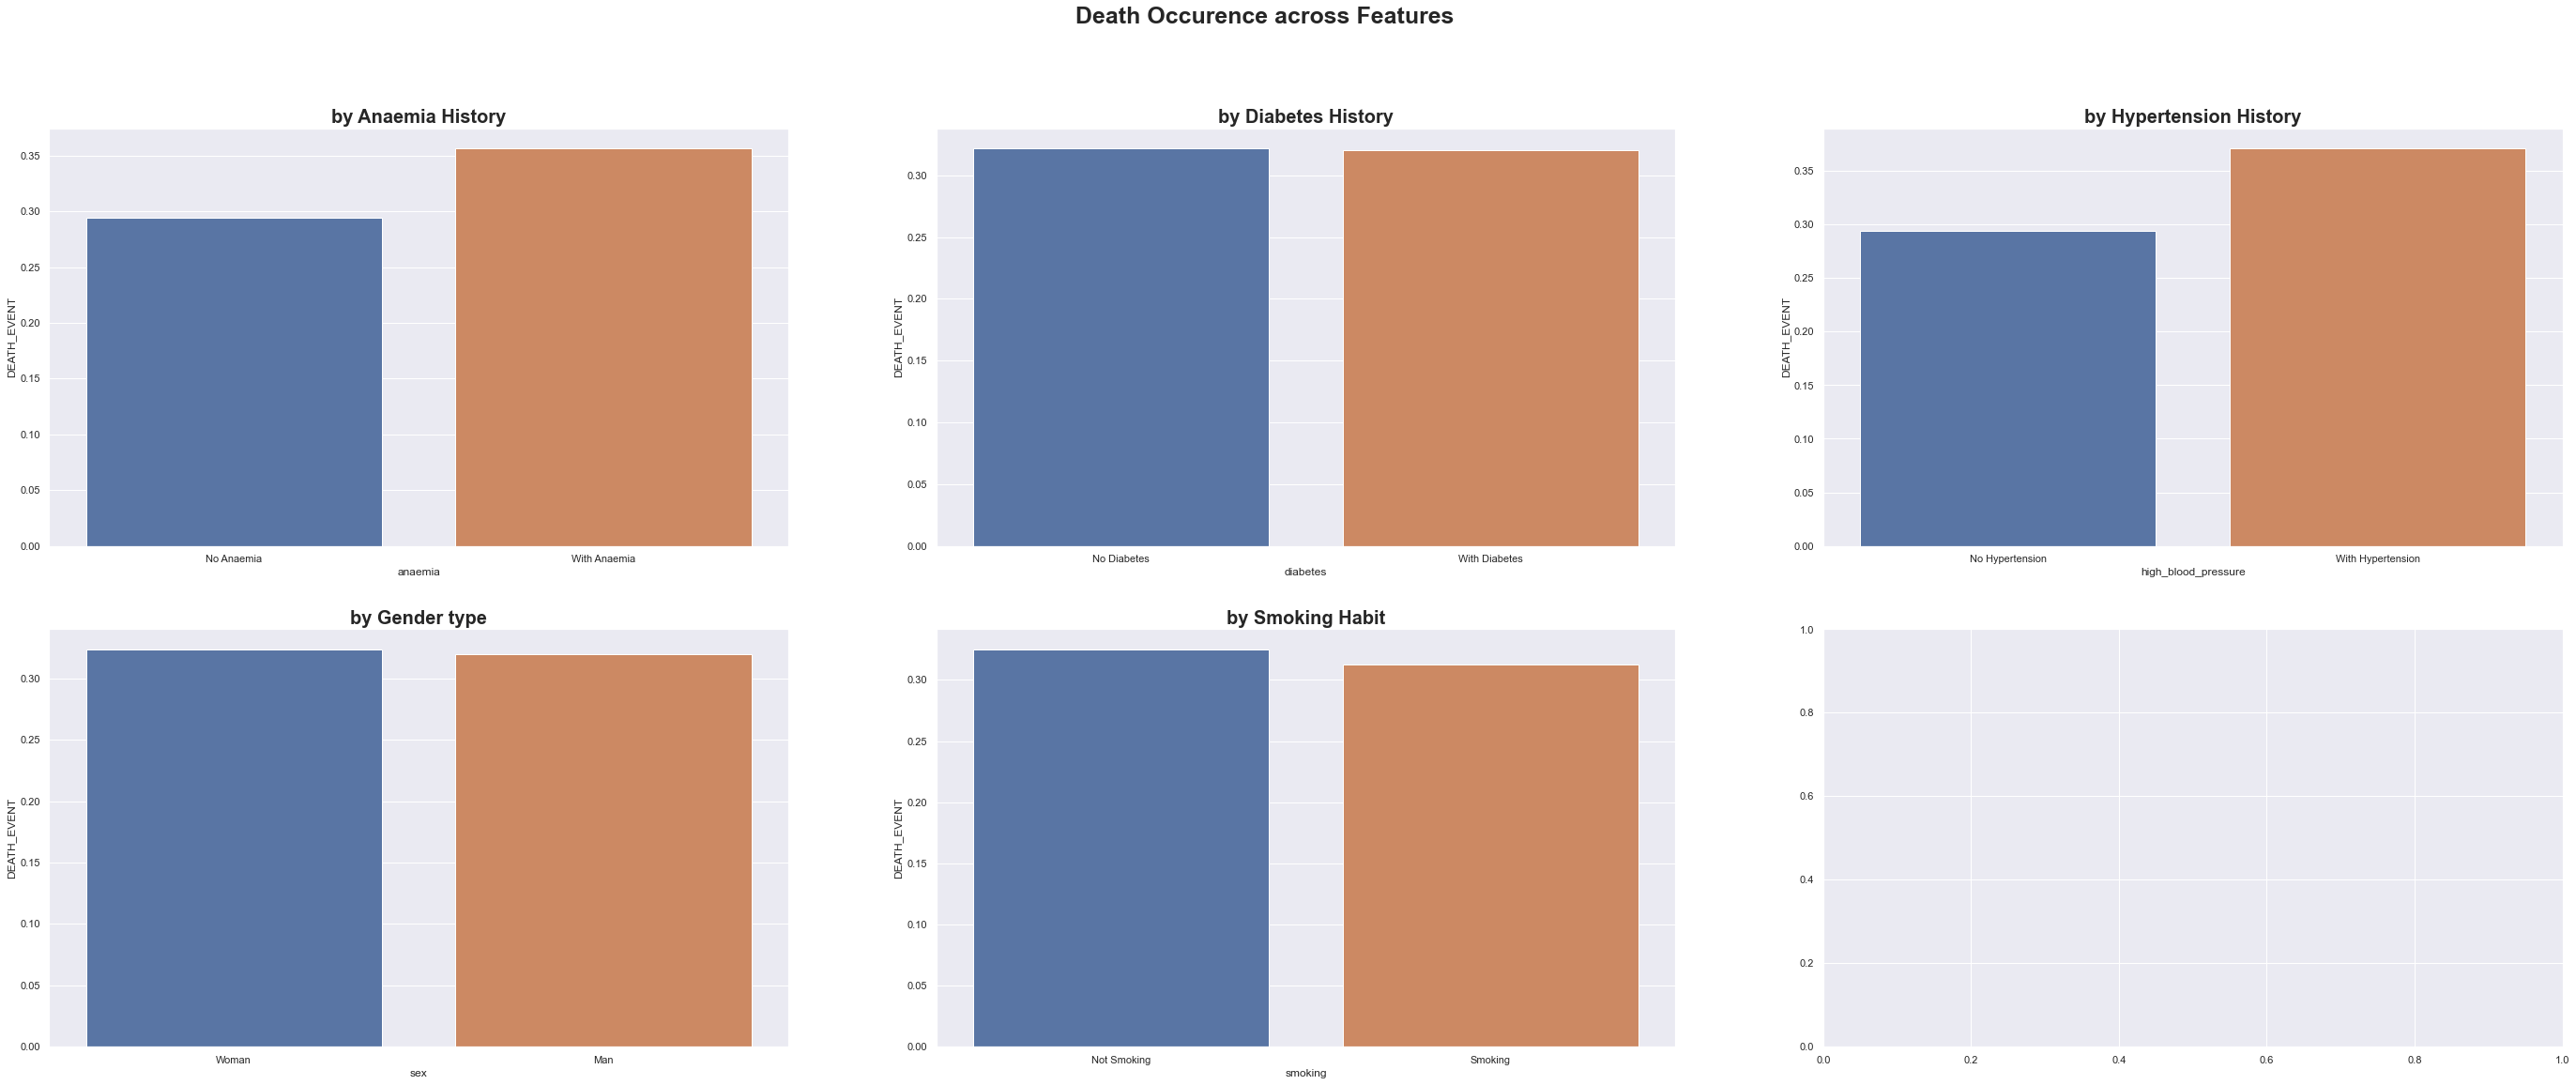

In [73]:
# Categorical Bivariate Analysis
fig, ax = plt.subplots(2,3, figsize=(24 * 2, 18))
fig.suptitle('Death Occurence across Features', fontsize=25, weight='bold')

graph1 = pd.DataFrame(df.groupby('anaemia')['DEATH_EVENT'].mean()).reset_index()
sns.barplot(x='anaemia', y='DEATH_EVENT', data=graph1, ax=ax[0,0]).set(xticklabels=['No Anaemia', 'With Anaemia'])
ax[0,0].set_title('by Anaemia History', weight='bold', fontsize=20)

graph2 = pd.DataFrame(df.groupby('diabetes')['DEATH_EVENT'].mean()).reset_index()
sns.barplot(x='diabetes', y='DEATH_EVENT', data=graph2, ax=ax[0,1]).set(xticklabels=['No Diabetes', 'With Diabetes'])
ax[0,1].set_title('by Diabetes History', weight='bold', fontsize=20)

graph3 = pd.DataFrame(df.groupby('high_blood_pressure')['DEATH_EVENT'].mean()).reset_index()
sns.barplot(x='high_blood_pressure', y='DEATH_EVENT', data=graph3, ax=ax[0,2]).set(xticklabels=['No Hypertension', 'With Hypertension'])
ax[0,2].set_title('by Hypertension History', weight='bold', fontsize=20)

graph4 = pd.DataFrame(df.groupby('sex')['DEATH_EVENT'].mean()).reset_index()
sns.barplot(x='sex', y='DEATH_EVENT', data=graph4, ax=ax[1,0]).set(xticklabels=['Woman', 'Man'])
ax[1,0].set_title('by Gender type', weight='bold', fontsize=20)

graph5 = pd.DataFrame(df.groupby('smoking')['DEATH_EVENT'].mean()).reset_index()
sns.barplot(x='smoking', y='DEATH_EVENT', data=graph5, ax=ax[1,1]).set(xticklabels=['Not Smoking', 'Smoking'])
ax[1,1].set_title('by Smoking Habit', weight='bold', fontsize=20)

Based on collection of graph above, We can see that:

- by `anaemia`: 
>people with `anaemia` history has `higher risk` of `DEATH_EVENT` caused by cardiovascular disease compared to people without `anaemia` history.
- by `diabetes`: 
>people with `diabetes` history has `equal risk` of `DEATH_EVENT` caused by cardiovascular disease compared to people without `diabetes` history.
- by `high_blood_pressure`: 
>people with `hypertension` history has `higher risk` of `DEATH_EVENT` caused by cardiovascular disease compared to people without `high_blood_pressure` history.
- by `sex` : 
>Either `Man` or `Woman` has `equal risk` of `DEATH_EVENT` caused by cardiovascular disease
- by `smoking`: 
>people with `smoking` habit has `equal risk` of `DEATH_EVENT` caused by cardiovascular disease compared to people without `smoking` habit.

**Multivariate Analysis**

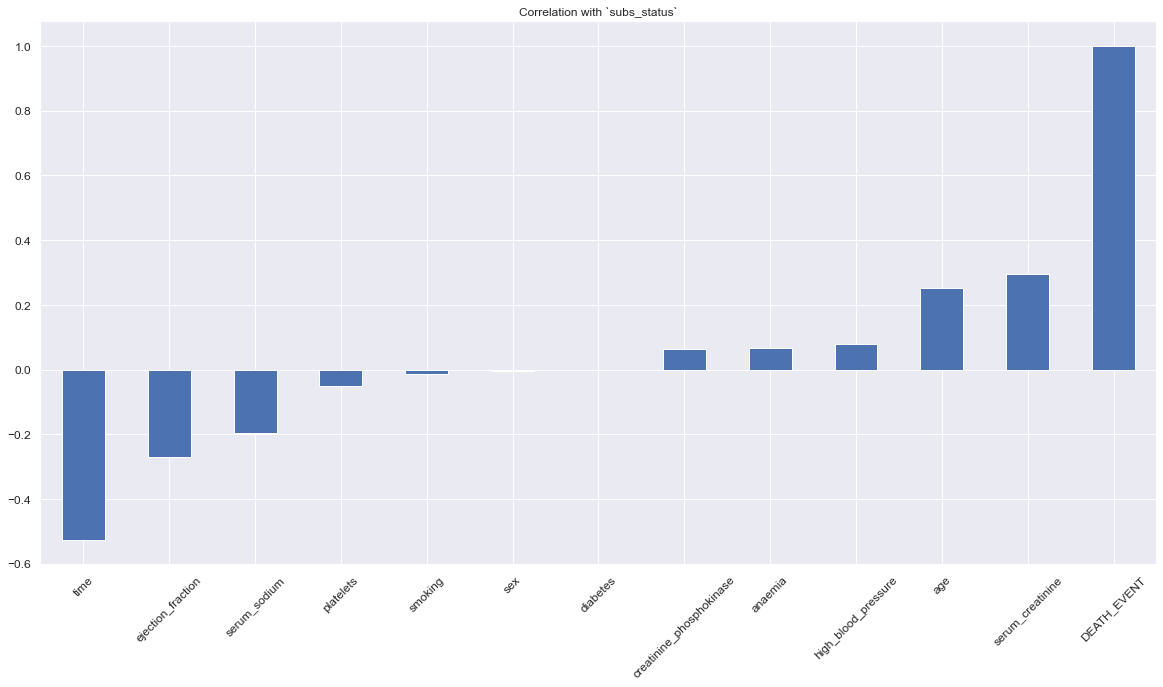

In [74]:
# Checking correlation between target variable and input variables

df.corrwith(df['DEATH_EVENT']).sort_values().plot.bar(figsize=(20,10), title='Correlation with `subs_status`', fontsize=12, rot=45, grid=True)
plt.show()

Based on graph above, I can summarize top features that correlate with `DEATH_EVENT` target label:

- top two positively correlated : `serum_creatinine, age`
- top three negatively correlated : `time, ejection_fraction, and serum_sodium`

Combining above analysis with `bivaraite analysis` in the previous process, We can get new insights here:
- From correlation above, it validates the facts tha the lower `ejection_fraction` has the higher risk of `DEATH_EVENT` caused by cardiovascular disease.
- From correlation above, it validates that either man or woman has equal risk to get `DEATH_EVENT` caused by cardiovascular disease. It shown that `sex` has low correlation with `DEATH_EVENT.`
- Previously We get the fact that people with `anaemia and hypertension` history, tends to get higher risk of `DEATH_EVENT` yet those two diseases actually has low correlation with  `DEATH_EVENT` caused by cardiovascular disease.

## Model Analysis

**Model-Algortihm**

In this project I will try these Algorithm, that are:
- Bagging meta-estimator
- Random Forest
- AdaBoost
- Gradient Tree Boosting

**Model Evaluation**

Based on cross-validation process, here is the result of each model:

In [75]:
# Showing the result
cv_result.sort_values(by='mean_score', ascending=False)

,models,mean_score,stdev_score
1,RF,0.8105,0.0874
2,Ada,0.7776,0.0953
3,GTB,0.7776,0.0953
0,BG,0.7594,0.0820


Based on result above, we can see the top model is `Random Forest`, it has the best `mean_score`, but the lowest `stdev_score` is acquired by `Bagging meta-estimator`. So basically `Bagging meta-estimator` is realatively more accurate than `Random Forest`.

Despite the ranking above, In my opinion all of those models are perform similarly well (except `Random Forest`). I decided to chose `Random Forest, AdaBoost, and Gradient Tree Boosting` algorithm and tune it and compare it again.

**Hyper Parameter Tuning**

`Random Forest`:
- criterion: `entropy`
- min_samples_split: `auto`
- max_features: `32`

`AdaBoost`:
- algorithm: `SAMME`
- learning_rate: `0.1`
- n_estimators: `100`

`Bagging meta-estimator`:
- bootsrap: `True`
- max_features: `4`
- warm_start: `True`


**Performance Summary**

**Random Forest**

In [76]:
#Performance Metrics
print('==================== Train Results (Random Forest) ====================')
print(classification_report(y_train, best_pipe_RF.predict(X_train), target_names=['Not Deceased', 'Deceased']))

print('==================== Test Results (Random Forest) ====================')
print(classification_report(y_test, best_pipe_RF.predict(X_test), target_names=['Not Deceased', 'Deceased']))

#Performance Metrics
print('==================== Train Results (Random Forest) ====================')
print(roc_auc_score(y_train, best_pipe_RF.predict(X_train)))

print('==================== Test Results (Random Forest) ====================')
print(roc_auc_score(y_test, best_pipe_RF.predict(X_test)))

==================== Train Results (Random Forest) ====================
              precision    recall  f1-score   support

Not Deceased       0.88      0.96      0.92       136
    Deceased       0.88      0.73      0.80        62

    accuracy                           0.88       198
   macro avg       0.88      0.84      0.86       198
weighted avg       0.88      0.88      0.88       198

==================== Test Results (Random Forest) ====================
              precision    recall  f1-score   support

Not Deceased       0.84      0.93      0.89        58
    Deceased       0.81      0.63      0.71        27

    accuracy                           0.84        85
   macro avg       0.83      0.78      0.80        85
weighted avg       0.83      0.84      0.83        85

==================== Train Results (Random Forest) ====================
0.8408444022770398
==================== Test Results (Random Forest) ====================
0.7803320561941253


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


**AdaBoost**

In [77]:
#Performance Metrics
print('==================== Train Results (AdaBoost) ====================')
print(classification_report(y_train, best_pipe_Ada.predict(X_train), target_names=['Not Deceased', 'Deceased']))

print('==================== Test Results (AdaBoost) ====================')
print(classification_report(y_test, best_pipe_Ada.predict(X_test), target_names=['Not Deceased', 'Deceased']))

print('==================== Train Results (AdaBoost) ====================')
print(roc_auc_score(y_train, best_pipe_Ada.predict(X_train)))

print('==================== Test Results (AdaBoost) ====================')
print(roc_auc_score(y_test, best_pipe_Ada.predict(X_test)))

==================== Train Results (AdaBoost) ====================
              precision    recall  f1-score   support

Not Deceased       0.87      0.96      0.91       136
    Deceased       0.88      0.69      0.77        62

    accuracy                           0.87       198
   macro avg       0.88      0.82      0.84       198
weighted avg       0.87      0.87      0.87       198

==================== Test Results (AdaBoost) ====================
              precision    recall  f1-score   support

Not Deceased       0.84      0.93      0.89        58
    Deceased       0.81      0.63      0.71        27

    accuracy                           0.84        85
   macro avg       0.83      0.78      0.80        85
weighted avg       0.83      0.84      0.83        85

==================== Train Results (AdaBoost) ====================
0.8247153700189753
==================== Test Results (AdaBoost) ====================
0.7803320561941253


**Bagging meta-estimator**

In [78]:
#Performance Metrics
print('==================== Train Results (Bagging) ====================')
print(classification_report(y_train, best_pipe_BG.predict(X_train), target_names=['Not Deceased', 'Deceased']))

print('==================== Test Results (Bagging) ====================')
print(classification_report(y_test, best_pipe_BG.predict(X_test), target_names=['Not Deceased', 'Deceased']))

print('==================== Train Results (Bagging) ====================')
print(roc_auc_score(y_train, best_pipe_BG.predict(X_train)))

print('==================== Test Results (Bagging) ====================')
print(roc_auc_score(y_test, best_pipe_BG.predict(X_test)))

==================== Train Results (Bagging) ====================
              precision    recall  f1-score   support

Not Deceased       0.94      1.00      0.97       136
    Deceased       1.00      0.87      0.93        62

    accuracy                           0.96       198
   macro avg       0.97      0.94      0.95       198
weighted avg       0.96      0.96      0.96       198

==================== Test Results (Bagging) ====================
              precision    recall  f1-score   support

Not Deceased       0.81      0.95      0.87        58
    Deceased       0.82      0.52      0.64        27

    accuracy                           0.81        85
   macro avg       0.82      0.73      0.75        85
weighted avg       0.81      0.81      0.80        85

==================== Train Results (Bagging) ====================
0.935483870967742
==================== Test Results (Bagging) ====================
0.7333971902937421


**Model Analysis Conclusion**

- Both `Random Forest` and `Bagging meta-estimator` model is `overfitting`, while `AdaBoost` model is `good fit.`
- Because the dataset is `imbalance,` the prediction models tends to predict `DEATH_EVENT` as `Not Deceased` rahter than `Deceased`. This can bee seen from f1_score on `Not Deceased` class which is higher than f1_score on `Deceased` class.

Since the only model that able to be considered as `goodfit` is only `AdaBoost`, I'll use it as my final model.

## Inference Result

In [79]:
# Evaluation for inference set
print('==================== Inference Results (AdaBoost) ====================')
print(classification_report(y_inf, y_inf_pred, target_names=['Not Deceased', 'Deceased']))

print('==================== Inference Results (AdaBoost) ====================')
print(roc_auc_score(y_inf, best_pipe_Ada.predict(X_inf)))

==================== Inference Results (AdaBoost) ====================
              precision    recall  f1-score   support

Not Deceased       0.67      0.89      0.76         9
    Deceased       0.75      0.43      0.55         7

    accuracy                           0.69        16
   macro avg       0.71      0.66      0.65        16
weighted avg       0.70      0.69      0.67        16

==================== Inference Results (AdaBoost) ====================
0.6587301587301587


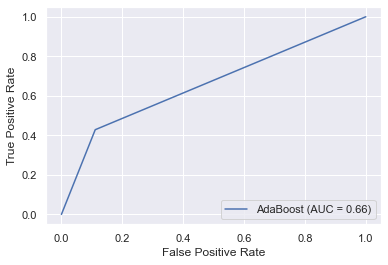

In [80]:
# Plot ROC-AUC curve
y = np.array(y_inf)
pred = np.array(y_inf_pred)

fpr, tpr, thresholds = roc_curve(y, pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='AdaBoost')
display.plot()

plt.show()

From above process, We can see that:
- If We focus on f1_score, I can say that the model perform way worse than on training and test phase.
- Although it perform worse, but if we focus on `precision and recall` score, I can say that my model is quite good. why?\
because it has `low false negative` count.
- Low false negative count means the model is less likely to mistakenly predict a healthy person as a `Deceased` person. It can be seen on higher `recall` score than `precision` score.
- From the `ROC-AUC Score`, I can say that the model is `quite capable` of predicting `DEATH_EVENT` on person/patient.